<a href="https://colab.research.google.com/github/aymuos/masters-practise-repo/blob/main/TERM2/ML/Assignment/ProgAssmt1_student_CH24M571.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print.

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names. (The Lasso regression problem requires you to split the data yourself)
    1. Problem 1 uses datasets 1_1, 1_2 and 1_3. (Classification)
    2. Problem 2 uses datasets 2_1 and 2_2. (Classification)
    3. Problem 3 uses datasets 3_1. (Regression)
    4. Problem 4 uses a small dataset described within the problem itself. (Regression)
    5. Problems 5,6,7,8 uses classification datasets A,B,C,D  (Classification)
    6. Problem 9 uses dataset LassoReg_data (Regression)

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.

12. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

13. Before submission ensure that the path for the folder containing the data is "../../Data/"


In [4]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set.

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [16]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """
    # same known co-variance
    # getting the mean for positive and negative classes

    u_positive = np.mean(X_train[Y_train == 1], axis=0)
    u_negative = np.mean(X_train[Y_train == -1], axis=0)

    # Mean of features where Y_train is 1 and -1 respectively

    # calculating the prior probabilities
    PY_1positive = np.sum(Y_train == 1) / len(Y_train)  # Proportion of data points with Y_train = 1
    PY_1negative = 1 - PY_1positive # Proportion of data points with Y_train = -1

    # storing the predictions

    Y_test_pred = np.zeros(X_test.shape[0])  # Initialize array to store predictions
    for i, x_test in enumerate(X_test):

        # Calculates the likelihood of the test data point belonging to the positive class, assuming a normal distribution with mean u_positive and identity covariance.
        likelihood_positive = np.exp(-0.5 * np.sum((x_test - u_positive)**2))
        likelihood_negative = np.exp(-0.5 * np.sum((x_test - u_negative)**2))

        # Calculate posterior probabilities (avoiding division by zero):
        # P(Y=1|X) = P(X|Y=1) * P(Y=1)
        posterior_pos = likelihood_positive * PY_1positive
        posterior_neg = likelihood_negative * PY_1negative   # P(Y=-1|X) = P(X|Y=-1) * P(Y=-1)

        # Assigning the predicted label:
        Y_test_pred[i] = 1 if posterior_pos >= posterior_neg else -1

    return Y_test_pred

def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """

    # same unknown covariance

    # Calculating means for each class
    u_positive = np.mean(X_train[Y_train == 1], axis=0)
    u_negative = np.mean(X_train[Y_train == -1], axis=0)

    # Calculating the shared covariance matrix
    # a shared covariance matrix (cov) is calculated from the entire training data.
    cov = np.cov(X_train, rowvar=False)

    # Handle singular covariance matrix (add small regularization)
    if np.linalg.cond(cov) > 1e10:  # Check for ill-conditioned matrix
        cov += np.eye(cov.shape[0]) * 1e-6

    # Calculate prior probabilities
    PY_1positive = np.sum(Y_train == 1) / len(Y_train)
    PY_1negative = 1 - PY_1positive

    # Make predictions
    Y_test_pred = np.zeros(X_test.shape[0])
    inv_cov = np.linalg.inv(cov)
    for i, x_test in enumerate(X_test):
        # Calculate likelihoods (using shared covariance)
        likelihood_pos = np.exp(-0.5 * (x_test - u_positive).T @ inv_cov @ (x_test - u_positive))
        likelihood_neg = np.exp(-0.5 * (x_test - u_negative).T @ inv_cov @ (x_test - u_negative))

        # Calculate posterior probabilities (avoiding division by zero)
        posterior_pos = likelihood_pos * PY_1positive
        posterior_neg = likelihood_neg * PY_1negative

        # Assign predicted label
        Y_test_pred[i] = 1 if posterior_pos >= posterior_neg else -1

    return Y_test_pred

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """
    # different unknown covariance

    # Calculating means and covariances for each class
    u_positive = np.mean(X_train[Y_train == 1], axis=0)
    u_negative = np.mean(X_train[Y_train == -1], axis=0)
    cov_positive = np.cov(X_train[Y_train == 1], rowvar=False)
    cov_negative = np.cov(X_train[Y_train == -1], rowvar=False)

    # Calculate prior probabilities
    PY_pos = np.sum(Y_train == 1) / len(Y_train)
    PY_neg = 1 - PY_pos

    # Make predictions
    Y_test_pred = np.zeros(X_test.shape[0])
    inv_cov_pos = np.linalg.inv(cov_positive)
    inv_cov_neg = np.linalg.inv(cov_negative)
    for i, x_test in enumerate(X_test):
        # Calculate likelihoods (using separate covariances)
        likelihood_pos = np.exp(-0.5 * (x_test - u_positive).T @ inv_cov_pos @ (x_test - u_positive)) / np.sqrt(np.linalg.det(cov_positive))
        likelihood_neg = np.exp(-0.5 * (x_test - u_negative).T @ inv_cov_neg @ (x_test - u_negative)) / np.sqrt(np.linalg.det(cov_negative))

        # Calculate posterior probabilities (avoiding division by zero)
        posterior_pos = likelihood_pos * PY_pos
        posterior_neg = likelihood_neg * PY_neg

        # Assign predicted label
        Y_test_pred[i] = 1 if posterior_pos >= posterior_neg else -1

    return Y_test_pred

def printPrediction(X_train, Y_train, X_test):
    """
    Given training data (X_train, Y_train) and test data X_test, applies three different Bayesian classifiers to the
    data and returns their predictions.

    Parameters:
    -----------
    X_train: array-like, shape (n_samples, n_features)
        The training input samples.
    Y_train: array-like, shape (n_samples,)
        The target values (class labels) for the training input samples.
    X_test: array-like, shape (n_samples, n_features)
        The test input samples.

    Returns:
    --------
    A tuple of three arrays, each of shape (n_samples,), containing the predicted class labels for the test input samples
    obtained using three different Bayesian classifiers (Bayes1a, Bayes1b, and Bayes1c), respectively.
    """
    Y_pred_1 = Bayes1a(X_train, Y_train, X_test)
    Y_pred_2 = Bayes1b(X_train, Y_train, X_test)
    Y_pred_3 = Bayes1c(X_train, Y_train, X_test)
    return Y_pred_1,Y_pred_2,Y_pred_3

def printErrorRate(Y_pred_1,Y_pred_2,Y_pred_3):
    """
    Given three arrays of predicted class labels (Y_pred_1, Y_pred_2, Y_pred_3), compares each of them with their
    corresponding test target values (Y_test1, Y_test2, Y_test3) and prints the classification error rate for each
    classifier.

    Parameters:
    -----------
    Y_pred_1: array-like, shape (n_samples,)
        The predicted class labels for the test data obtained using the first Bayesian classifier.
    Y_pred_2: array-like, shape (n_samples,)
        The predicted class labels for the test data obtained using the second Bayesian classifier.
    Y_pred_3: array-like, shape (n_samples,)
        The predicted class labels for the test data obtained using the third Bayesian classifier.

    Returns:
    --------
    None. The function prints the classification error rate for each classifier to the output console.
    """
    print(1-(Y_pred_1 == Y_test1).sum() / len(Y_test1))
    print(1-(Y_pred_2 == Y_test2).sum() / len(Y_test2))
    print(1-(Y_pred_3 == Y_test3).sum() / len(Y_test3))
def plot_classifier(ax, title, X, Y, Bayes, pos_X, neg_X):
    """
    Given an axis object, a title, the meshgrid coordinates (X, Y), the Bayesian decision function (Bayes), and two
    sets of training data points (pos_X and neg_X), plots the decision boundary and the training data points on the axis.

    Parameters:
    -----------
    ax: matplotlib.axes.Axes object
        The axis object on which to plot the decision boundary and the training data points.
    title: str
        The title of the plot.
    X: array-like, shape (n_samples, n_features)
        The X-coordinates of the meshgrid.
    Y: array-like, shape (n_samples, n_features)
        The Y-coordinates of the meshgrid.
    Bayes: array-like, shape (n_samples, n_features)
        The Bayesian decision function evaluated on the meshgrid coordinates.
    pos_X: array-like, shape (n_pos_samples, n_features)
        The positive class training data points.
    neg_X: array-like, shape (n_neg_samples, n_features)
        The negative class training data points.

    Returns:
    --------
    None. The function plots the decision boundary and the training data points on the axis object.
    """
    # Plot the decision boundary
    ax.contourf(X, Y, Bayes.reshape(X.shape), alpha=0.5, colors=['lightcoral', 'palegreen'])
    # Plot the training data points
    ax.scatter(pos_X[:, 0], pos_X[:, 1], c='blue', label='Positive', alpha=0.25, marker = '+', s = 115)
    ax.scatter(neg_X[:, 0], neg_X[:, 1], c='yellow', label='Negative', alpha=0.25, marker = 'o')
    # Set the x and y labels and the title
    ax.set_xlabel('X1', fontsize=14)
    ax.set_ylabel('X2', fontsize=14)
    ax.title.set_text(title)
    # Add the legend
    ax.legend()


def printPlot(X_train,Y_train,pos_X_train,neg_X_train,datasetName):
    """
    Plots the Bayes classifier with assumptions 1a, 1b, and 1c on a dataset.

    Parameters:
    X_train (numpy.ndarray): The training data features.
    Y_train (numpy.ndarray): The training data labels.
    pos_X_train (numpy.ndarray): The positive class training data features.
    neg_X_train (numpy.ndarray): The negative class training data features.
    datasetName (str): The name of the dataset being plotted.

    Returns:
    None.

    """
    X_axis, Y_axis = np.meshgrid(np.arange(start = X_train[:, 0].min() - 0.5, stop = X_train[:, 0].max() + 0.5, step = 0.1),np.arange(start = X_train[:, 1].min() - 0.5, stop = X_train[:, 1].max() + 0.5, step = 0.1))
    fig, ax = plt.subplots(nrows = 1, ncols = 3)
    fig.suptitle(f'Bayes Classifier for {datasetName} with assumptions 1a, 1b, and 1c respectively')
    plot_classifier(ax[0], 'Classifier with assumption 1a', X_axis, Y_axis, Bayes1a(X_train, Y_train, np.array([X_axis.ravel(), Y_axis.ravel()]).T), pos_X_train, neg_X_train)
    plot_classifier(ax[1], 'Classifier with assumption 1b', X_axis, Y_axis, Bayes1b(X_train, Y_train1, np.array([X_axis.ravel(), Y_axis.ravel()]).T), pos_X_train, neg_X_train)
    plot_classifier(ax[2], 'Classifier with assumption 1c', X_axis, Y_axis, Bayes1c(X_train, Y_train1, np.array([X_axis.ravel(), Y_axis.ravel()]).T), pos_X_train, neg_X_train)
    plt.show()

def sepClass(X,Y):
    """
    Returns two subsets of feature matrix X, containing instances where Y is equal to 1 and -1 respectively.

    Parameters:
    X (numpy array): Feature matrix of shape (m, n)
    Y (numpy array): Target vector of shape (m, )

    Returns:
    pos_X (numpy array): Subset of X containing instances where Y is equal to 1, of shape (pos_m, n)
    neg_X (numpy array): Subset of X containing instances where Y is equal to -1, of shape (neg_m, n)
    """
    return X[Y[:,] == 1],X[Y[:,] == -1]

def verifyingResult(Y_pred_1_1,Y_pred_1_2,Y_pred_1_3,Y_pred_2_1,Y_pred_2_2,Y_pred_2_3,Y_pred_3_1,Y_pred_3_2,Y_pred_3_3):
    """
    Prints the error rate for each of the nine combinations of predicted values and true values.

    Parameters:
    Y_pred_1_1 (numpy array): Predicted target variable for dataset 1 using assumption 1a, of shape (m1, )
    Y_pred_1_2 (numpy array): Predicted target variable for dataset 1 using assumption 1b, of shape (m1, )
    Y_pred_1_3 (numpy array): Predicted target variable for dataset 1 using assumption 1c, of shape (m1, )
    Y_pred_2_1 (numpy array): Predicted target variable for dataset 2 using assumption 1a, of shape (m2, )
    Y_pred_2_2 (numpy array): Predicted target variable for dataset 2 using assumption 1b, of shape (m2, )
    Y_pred_2_3 (numpy array): Predicted target variable for dataset 2 using assumption 1c, of shape (m2, )
    Y_pred_3_1 (numpy array): Predicted target variable for dataset 3 using assumption 1a, of shape (m3, )
    Y_pred_3_2 (numpy array): Predicted target variable for dataset 3 using assumption 1b, of shape (m3, )
    Y_pred_3_3 (numpy array): Predicted target variable for dataset 3 using assumption 1c, of shape (m3, )

    Returns:
    None
    """
    print('#Error Rate validation')
    printErrorRate(Y_pred_1_1,Y_pred_1_2,Y_pred_1_3)
    printErrorRate(Y_pred_2_1,Y_pred_2_2,Y_pred_2_3)
    printErrorRate(Y_pred_3_1,Y_pred_3_2,Y_pred_3_3)




In [17]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just
# solve the problem for this one example given below.)


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red, for reference see Bishop Fig 4.5). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately.

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets (use X_test and Y_test) as 3x3 table, with appropriately named rows and columns.


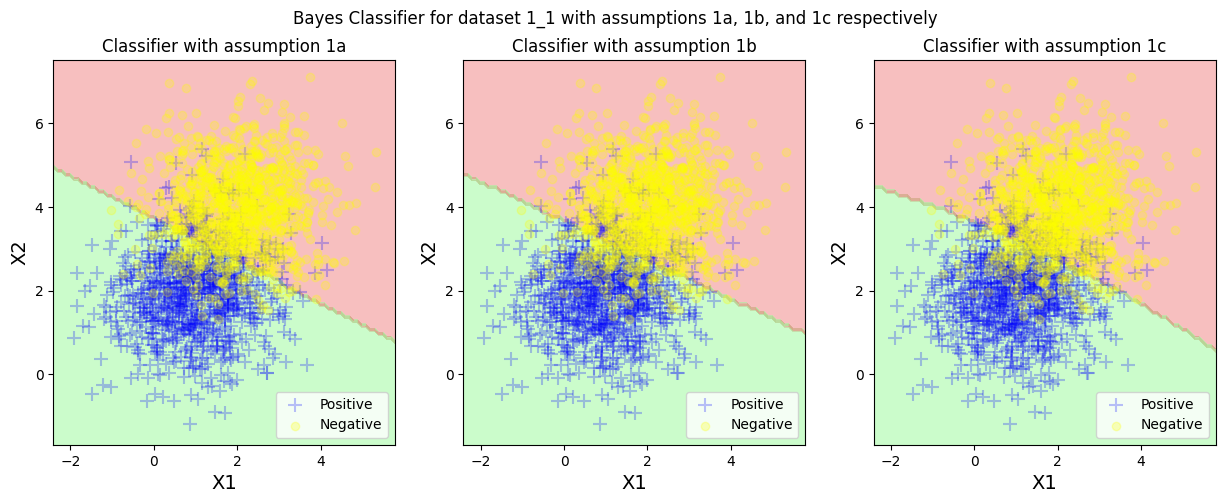

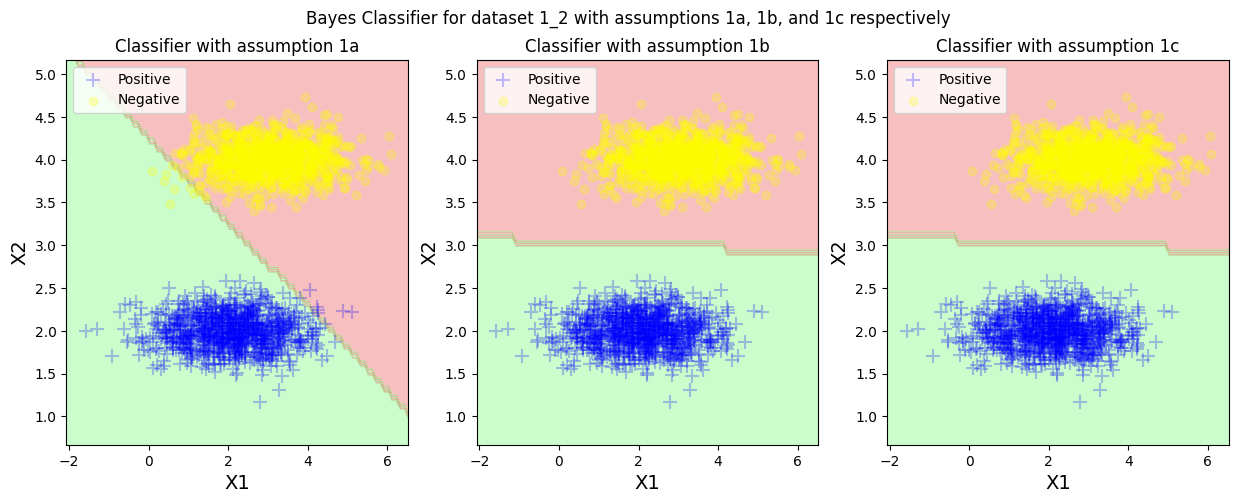

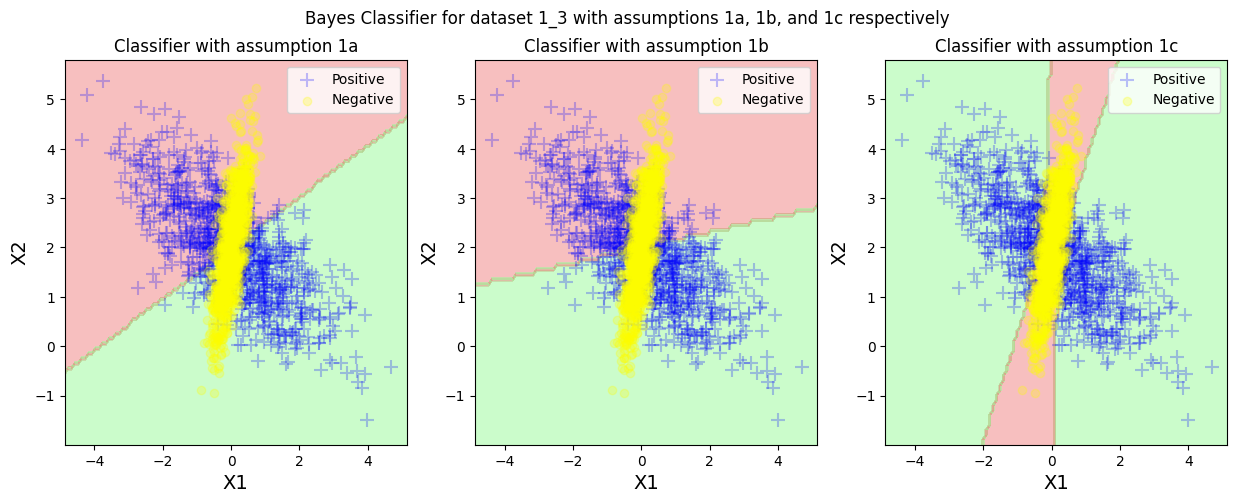

#Error Rate validation
0.126
0.12450000000000006
0.12450000000000006
0.008499999999999952
0.0
0.0
0.497
0.495
0.135


In [20]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here.
# (Use the functions written previously.)

files = ['../../Data/dataset1_1.npz', '../../Data/dataset1_2.npz', '../../Data/dataset1_3.npz']
# files = ['./dataset1_1.npz', './dataset1_2.npz', './dataset1_3.npz']

train_features = []
train_labels = []
test_features = []
test_labels = []

for file in files:
    data = np.load(file)
    train_features.append(data['arr_0'])
    train_labels.append(data['arr_1'])
    test_features.append(data['arr_2'])
    test_labels.append(data['arr_3'])
X_train1,X_train2,X_train3,Y_train1,Y_train2,Y_train3,X_test1,X_test2,X_test3,Y_test1,Y_test2,Y_test3 = train_features[0],train_features[1],train_features[2],train_labels[0],train_labels[1],train_labels[2],test_features[0],test_features[1],test_features[2],test_labels[0],test_labels[1],test_labels[2]

#Calculate Prediction
Y_pred_1_1,Y_pred_1_2,Y_pred_1_3 = printPrediction(X_train1, Y_train1, X_test1)
Y_pred_2_1,Y_pred_2_2,Y_pred_2_3 = printPrediction(X_train2, Y_train2, X_test2)
Y_pred_3_1,Y_pred_3_2,Y_pred_3_3 = printPrediction(X_train3, Y_train3, X_test3)

#Separating the positive and the negative class
pos_X_train1,neg_X_train1 = sepClass(X_train1,Y_train1)
pos_X_train2,neg_X_train2 = sepClass(X_train2,Y_train2)
pos_X_train3,neg_X_train3 = sepClass(X_train3,Y_train3)

#Plotting to view the result
plt.rcParams['figure.figsize'] = [15,5]
printPlot(X_train1,Y_train1,pos_X_train1,neg_X_train1,'dataset 1_1')
printPlot(X_train2,Y_train2,pos_X_train2,neg_X_train2,'dataset 1_2')
printPlot(X_train3,Y_train3,pos_X_train3,neg_X_train3,'dataset 1_3')

# Verification of result - Uncomment if need to review the result
# verifyingResult(Y_pred_1_1,Y_pred_1_2,Y_pred_1_3,Y_pred_2_1,Y_pred_2_2,Y_pred_2_3,Y_pred_3_1,Y_pred_3_2,Y_pred_3_3)


** Cell type : TextWrite **
(Write your observations and table of errors here)

---

### Error Rate:
| Dataset\Assumption | Classifier 1a  | Classifier 1b | Classifier 1c |
| :---:              | :-------------:|:-----------:  |      :------: |
| Dataset 1          | 0.126          | 0.12450000000000006        | 0.12450000000000006       |
| Dataset 2          | 0.008499999999999952         | 0             |             0 |
| Dataset 3          | 0.497          | 0.495         |         0.264 |

### Observations:

Accuracy improves from 1a to 1c because:

1a assumes both classes (+1 and -1) have the same variance, ignoring real differences in the data.

1b improves by using a shared variance, but this still fails if the classes spread differently (like in Dataset 3).

1c works best by calculating separate variances for each class, handled well by Naive Bayes Classification.





** Cell type : TextRead **


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [12]:
# Cell type : CodeWrite
# Fill in functions in this cell

#Initialize the loss matrix : Given data
L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])

def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """
    # Compute class-wise mean and prior probability
    class_means = {c: np.mean(X_train[Y_train == c], axis=0) for c in np.unique(Y_train)}
    class_priors = {c: np.mean(Y_train == c) for c in np.unique(Y_train)}

    # Initialize prediction array
    identity_matrix = np.eye(X_train.shape[1])
    predictions = np.zeros(X_test.shape[0])

    # Iterate over test samples
    for idx, sample in enumerate(X_test):
        likelihoods = {c: class_priors[c] * np.exp(-0.5 * (sample - class_means[c]) @ identity_matrix @ (sample - class_means[c]))
                       for c in class_means}
        posterior_probs = {c: likelihoods[c] / sum(likelihoods.values()) for c in likelihoods}

        # Compute loss and predict class
        predictions[idx] = np.argmin(np.dot(list(posterior_probs.values()), L)) + 1

    return predictions

def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """
    """Bayes classifier prediction using assumption 2b."""

    # Compute class means and prior probabilities
    class_means = {c: np.mean(X_train[Y_train == c], axis=0) for c in np.unique(Y_train)}
    class_priors = {c: np.mean(Y_train == c) for c in np.unique(Y_train)}

    # Compute covariance matrix
    covariance_matrix = np.cov(X_train, rowvar=False)
    inverse_cov = np.linalg.inv(covariance_matrix)

    # Initialize prediction array
    predictions = np.zeros(X_test.shape[0])

    # Iterate over test samples
    for idx, sample in enumerate(X_test):
        likelihoods = {c: class_priors[c] * np.exp(-0.5 * (sample - class_means[c]) @ inverse_cov @ (sample - class_means[c]))
                       for c in class_means}
        posterior_probs = {c: likelihoods[c] / sum(likelihoods.values()) for c in likelihoods}

        # Compute loss and predict class
        predictions[idx] = np.argmin(np.dot(list(posterior_probs.values()), L)) + 1

    return predictions

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)

    """
    classes = np.unique(Y_train)
    class_stats = {
        label: {
            "mean": np.mean(X_train[Y_train == label], axis=0),
            "prior": np.mean(Y_train == label),
            "cov": np.cov(X_train[Y_train == label], rowvar=False)
        }
        for label in classes
    }

    predictions = np.zeros(X_test.shape[0])

    for idx, sample in enumerate(X_test):
        likelihoods = [
            stats["prior"] * np.exp(-0.5 * (sample - stats["mean"]) @ np.linalg.inv(stats["cov"]) @ (sample - stats["mean"]))
            / np.sqrt(np.linalg.det(stats["cov"]))
            for stats in class_stats.values()
        ]
        posterior_probs = likelihoods / np.sum(likelihoods)

        predictions[idx] = np.argmin(np.dot(posterior_probs, L)) + 1

    return predictions

def printPrediction(X_train, Y_train, X_test):
    """Apply Bayesian classifiers to the dataset and return predictions."""
    return (
        Bayes2a(X_train, Y_train, X_test),
        Bayes2b(X_train, Y_train, X_test),
        Bayes2c(X_train, Y_train, X_test)
    )

def printErrorRate(Y_pred_1, Y_pred_2, Y_pred_3, Y_test1):
    """Compute and print classification error rates for three Bayesian classifiers."""
    for Y_pred in (Y_pred_1, Y_pred_2, Y_pred_3):
        print(1 - np.mean(Y_pred == Y_test1))

def printPlot(X_train, Y_train, one_X_train, two_X_train, three_X_train, four_X_train, datasetName):
    """Generate and display decision boundaries for three Bayesian classifiers."""
    X_axis, Y_axis = np.meshgrid(
        np.arange(X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5, 0.1),
        np.arange(X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5, 0.1)
    )

    fig, axes = plt.subplots(1, 3)
    fig.suptitle(f'Bayes Classifier for {datasetName} with assumptions 2a, 2b, and 2c')
    titles = ['Classifier with assumption 2a', 'Classifier with assumption 2b', 'Classifier with assumption 2c']

    for ax, title, bayes_func in zip(axes, titles, [Bayes2a, Bayes2b, Bayes2c]):
        ax.contourf(
            X_axis, Y_axis,
            bayes_func(X_train, Y_train, np.c_[X_axis.ravel(), Y_axis.ravel()]).reshape(X_axis.shape),
            alpha=0.5, colors=['lightblue', 'orange', 'lightcoral', 'palegreen']
        )

        for data, color, label, marker in zip(
            [one_X_train, two_X_train, three_X_train, four_X_train],
            ['black', 'purple', 'gold', 'red'],
            ['One', 'Two', 'Three', 'Four'],
            ['+', 'o', 's', 'x']
        ):
            ax.scatter(data[:, 0], data[:, 1], c=color, label=label, alpha=0.25, marker=marker, s=30)

        ax.set_xlabel('X1', fontsize=15)
        ax.set_ylabel('X2', fontsize=15)
        ax.set_title(title)
        ax.legend()

def sepClass(X, Y):
    """Separate feature matrix X based on class labels Y."""
    return tuple(X[Y == label] for label in range(1, 5))

def verifyingResult(Y_test, Y_pred, message):
    """Compute and print the confusion matrix and expected loss."""
    print(f'#Result verification for {message}')

    count = {i: {j: 0 for j in range(1, 5)} for i in range(1, 5)}
    for actual, predicted in zip(Y_test, Y_pred):
        count[actual][predicted] += 1

    count_matrix = np.array([[count[i][j] for j in range(1, 5)] for i in range(1, 5)])

    expected_loss = sum(L[i, j] * count_matrix[i, j] for i in range(4) for j in range(4)) / len(Y_test)
    print(expected_loss)

    conf_matrix_percentage = count_matrix / len(Y_test)
    if np.isclose(conf_matrix_percentage.sum(), 1):
        print(conf_matrix_percentage)
        print(count_matrix)







In [13]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately.

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets.


#Result verification for Y_test1 VS Y_pred_1_1
0.42975
[[0.15825 0.05475 0.034   0.003  ]
 [0.02425 0.1845  0.0155  0.02575]
 [0.0215  0.01225 0.1925  0.02375]
 [0.00375 0.034   0.0485  0.16375]]
[[633 219 136  12]
 [ 97 738  62 103]
 [ 86  49 770  95]
 [ 15 136 194 655]]
#Result verification for Y_test1 VS Y_pred_1_2
0.4575
[[0.11575 0.097   0.03625 0.001  ]
 [0.01075 0.19775 0.02825 0.01325]
 [0.01    0.02375 0.2045  0.01175]
 [0.001   0.03725 0.0865  0.12525]]
[[463 388 145   4]
 [ 43 791 113  53]
 [ 40  95 818  47]
 [  4 149 346 501]]
#Result verification for Y_test1 VS Y_pred_1_3
0.428
[[0.15825 0.0545  0.0345  0.00275]
 [0.02475 0.1855  0.01525 0.0245 ]
 [0.02175 0.01175 0.193   0.0235 ]
 [0.00375 0.0335  0.05025 0.1625 ]]
[[633 218 138  11]
 [ 99 742  61  98]
 [ 87  47 772  94]
 [ 15 134 201 650]]
#Result verification for Y_test2 VS Y_pred_2_1
0.1835
[[0.2075  0.0375  0.0045  0.0005 ]
 [0.02325 0.196   0.0115  0.01925]
 [0.0075  0.01525 0.22625 0.001  ]
 [0.      0.00575 0.0195 

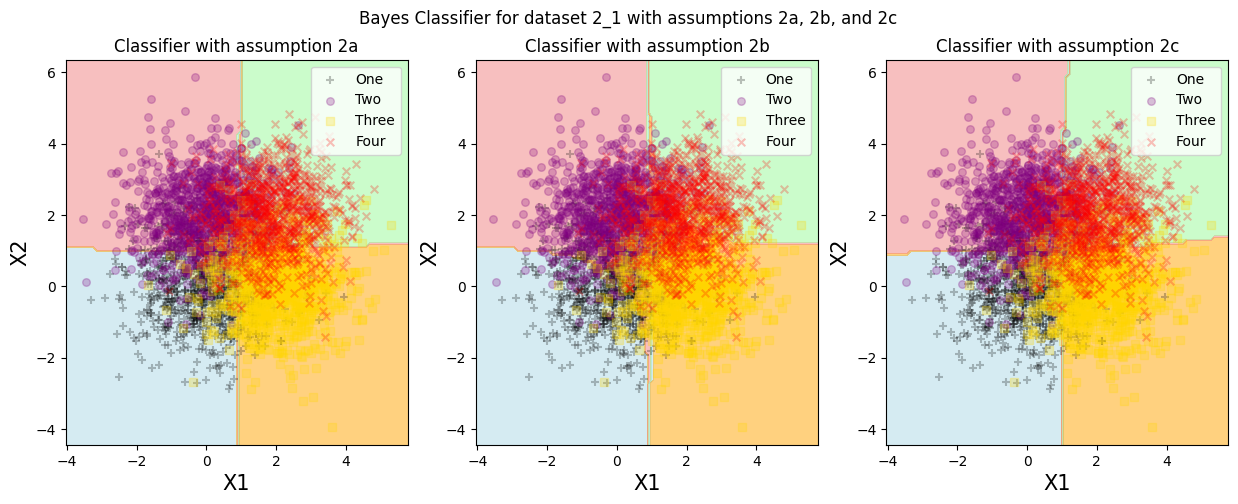

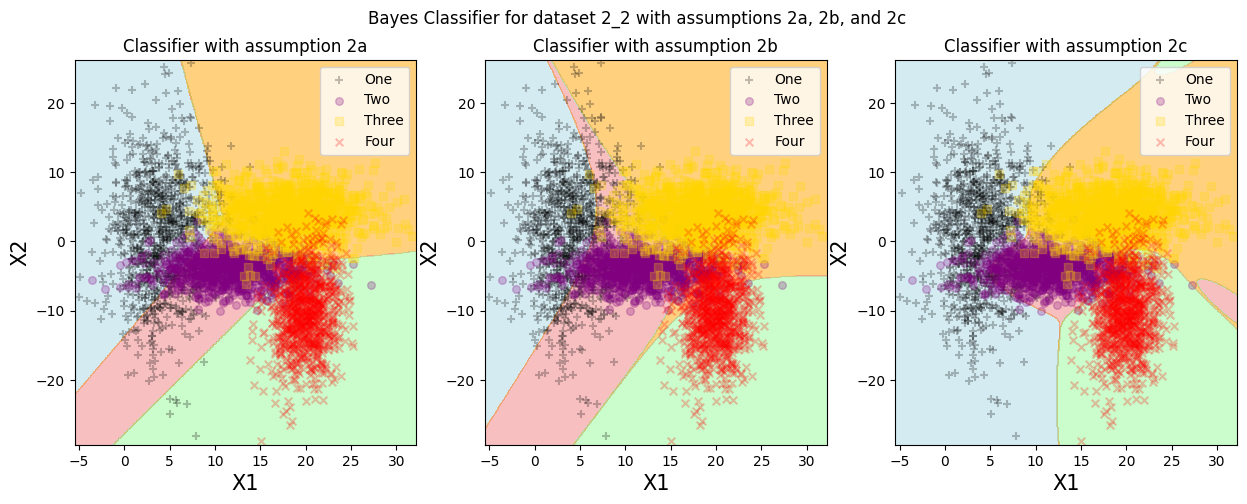

In [14]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here.
# (Use the functions written previously.)

# files = ['./dataset2_1.npz', './dataset2_2.npz']

files = ['../../Data/dataset2_1.npz', '../../Data/dataset2_2.npz']

train_features = []
train_labels = []
test_features = []
test_labels = []
for file in files:
    data = np.load(file)
    train_features.append(data['arr_0'])
    train_labels.append(data['arr_1'])
    test_features.append(data['arr_2'])
    test_labels.append(data['arr_3'])

X_train1,X_train2,Y_train1,Y_train2,X_test1,X_test2,Y_test1,Y_test2 = train_features[0],train_features[1],train_labels[0],train_labels[1],test_features[0],test_features[1],test_labels[0],test_labels[1]

#Calculate Prediction
Y_pred_1_1,Y_pred_1_2,Y_pred_1_3 = printPrediction(X_train1, Y_train1, X_test1)
Y_pred_2_1,Y_pred_2_2,Y_pred_2_3 = printPrediction(X_train2, Y_train2, X_test2)

#Separating each classes'
one_X_train1,two_X_train1,three_X_train1,four_X_train1 = sepClass(X_train1,Y_train1)
one_X_train2,two_X_train2,three_X_train2,four_X_train2 = sepClass(X_train2,Y_train2)

#Print the plots
plt.rcParams['figure.figsize'] = [15,5]
printPlot(X_train1,Y_train1,one_X_train1,two_X_train1,three_X_train1,four_X_train1,'dataset 2_1')
printPlot(X_train2,Y_train2,one_X_train2,two_X_train2,three_X_train2,four_X_train2,'dataset 2_2')

# Verification of result - Uncomment if need to review the result
verifyingResult(Y_test1, Y_pred_1_1, 'Y_test1 VS Y_pred_1_1')
verifyingResult(Y_test1, Y_pred_1_2, 'Y_test1 VS Y_pred_1_2')
verifyingResult(Y_test1, Y_pred_1_3, 'Y_test1 VS Y_pred_1_3')
verifyingResult(Y_test2, Y_pred_2_1, 'Y_test2 VS Y_pred_2_1')
verifyingResult(Y_test2, Y_pred_2_2, 'Y_test2 VS Y_pred_2_2')
verifyingResult(Y_test2, Y_pred_2_3, 'Y_test2 VS Y_pred_2_3')


** Cell type : TextWrite **
(Write your observations and table of errors here)


---


Observation


---


The loss matrix (representing the maximum error) quantifies how far a predicted class deviates from the true class. To minimize this error, we refine the decision boundaries using insights from the confusion matrix (which reflects minimum error). As we transition from Assumption 2a to 2c, the decision boundaries become increasingly precise due to better modeling assumptions. However, for Dataset 2_1, we observe no significant improvement in boundary quality. This stagnation may stem from the inherent difficulty in separating the two classes, as they appear heavily mixed in the feature space, making clear distinctions challenging even with more sophisticated assumptions.

---

### Dataset 2_1

---

### Confusion Matrix in decimal % obtained by using classifier 2a

| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 0.15825        | 0.05475       | 0.034         |  0.003      |
|  2             | 0.02425        | 0.1845        | 0.0155        |  0.02575    |
|  3             | 0.0215         | 0.01225       | 0.1925        |  0.02375    |
|  4             | 0.00375        | 0.034         | 0.0485        |  0.16375    |

### Confusion Matrix in number obtained by using classifier 2a

| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 633| 219 | 136 | 12   |
|  2             | 97 | 738 | 62 | 103    |
|  3             | 86 |  49 |770 | 95    |
|  4             | 15 |136 | 194 | 655   |
---

### Confusion Matrix in decimal % obtained by using classifier 2b

| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 0.11575        | 0.097        | 0.03625         |  0.001      |
|  2             | 0.01075        | 0.19775        | 0.02825        |  0.01325    |
|  3             | 0.01         | 0.02375       | 0.2045        |  0.01175    |
|  4             | 0.001        | 0.03725         | 0.0865        |  0.12525    |

### Confusion Matrix in number obtained by using classifier 2b

| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 463 | 388 | 145 |  4   |
|  2             | 43 | 791 | 113 |  53    |
|  3             | 40 | 95 | 818 | 47   |
|  4             | 4 | 149 | 346 | 501   |

---


### Confusion Matrix in decimal % obtained by using classifier 2c

| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 0.15825        | 0.0545       | 0.0345         |  0.00275      |
|  2             | 0.02475        | 0.1855        | 0.01525        |  0.0245     |
|  3             | 0.02175         | 0.01175       | 0.193        |  0.0235     |
|  4             | 0.00375        | 0.0335         | 0.05025        |  0.1625    |

### Confusion Matrix in number obtained by using classifier 2c

| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 633 | 218 | 138 | 11  |
|  2             | 99 | 742 | 61 | 98    |
|  3             | 87 | 47 | 772 | 94   |
|  4             | 15 | 134 | 201 | 650  |

---

### Dataset 2_2
---

### Confusion Matrix in decimal % obtained by using classifier 2a


| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 0.2075        | 0.0375       | 0.0045         |  0.0005      |
|  2             | 0.02325        | 0.196        | 0.0115        |  0.01925    |
|  3             | 0.0075         | 0.01525       | 0.22625        |  0.001    |
|  4             | 0.        | 0.00575         | 0.0195        |  0.22475    |

### Confusion Matrix in number obtained by using classifier 2a
| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 830 | 150 | 18 |  2 |
|  2             | 93 | 784 | 46 | 77   |
|  3             | 30 | 61 | 905 |  4  |
|  4             | 0 | 23 | 78 | 899  |

---

### Confusion Matrix in decimal % obtained by using classifier 2b


| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 0.16875        | 0.0755        | 0.00575         |  0.      |
|  2             | 0.00975        | 0.18725        | 0.05125        |  0.00175    |
|  3             | 0.00175         | 0.0295       | 0.21875        |  0.    |
|  4             | 0.        | 0.00075         | 0.07425        |  0.175    |

### Confusion Matrix in number obtained by using classifier 2b
| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 675 | 302 | 23 |  0  |
|  2             | 39 | 749 | 205 |   7    |
|  3             | 7 | 118 | 875  | 0   |
|  4             | 0  | 3 | 297 | 700  |

---

### Confusion Matrix in decimal % obtained by using classifier 2c

| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 0.22525        | 0.02       | 0.00475         |  0.      |
|  2             | 0.016        | 0.206        | 0.01175        |  0.01625    |
|  3             | 0.00475         | 0.00775       | 0.234        |  0.0035    |
|  4             | 0.        | 0.009         | 0.012        |  0.229    |

### Confusion Matrix in number obtained by using classifier 2c
| True\Predicted | 1              |  2            |  3            | 4           |
| :---:          | :-------------:|:-----------:  |      :------: |:----:       |
|  1             | 901 | 80 | 19 |  0  |
|  2             | 64 | 824 | 47 | 65    |
|  3             | 19 | 31 | 936 | 14  |
|  4             | 0 | 36  | 48 | 916  |

---

### Expected Loss
---

| Dataset\Assumption | Classifier 2a  | Classifier 2b | Classifier 2c |
| :---:              | :-------------:|:-----------:  |      :------: |
| Dataset 1          | 0.42975        | 0.4575        | 0.428         |
| Dataset 2          | 0.1835         | 0.26025       | 0.1405        |


In [ ]:
# Cell type: convenience



**Cell type : TextRead**


# Problem 3 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset3_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the approppriate number samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels .

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




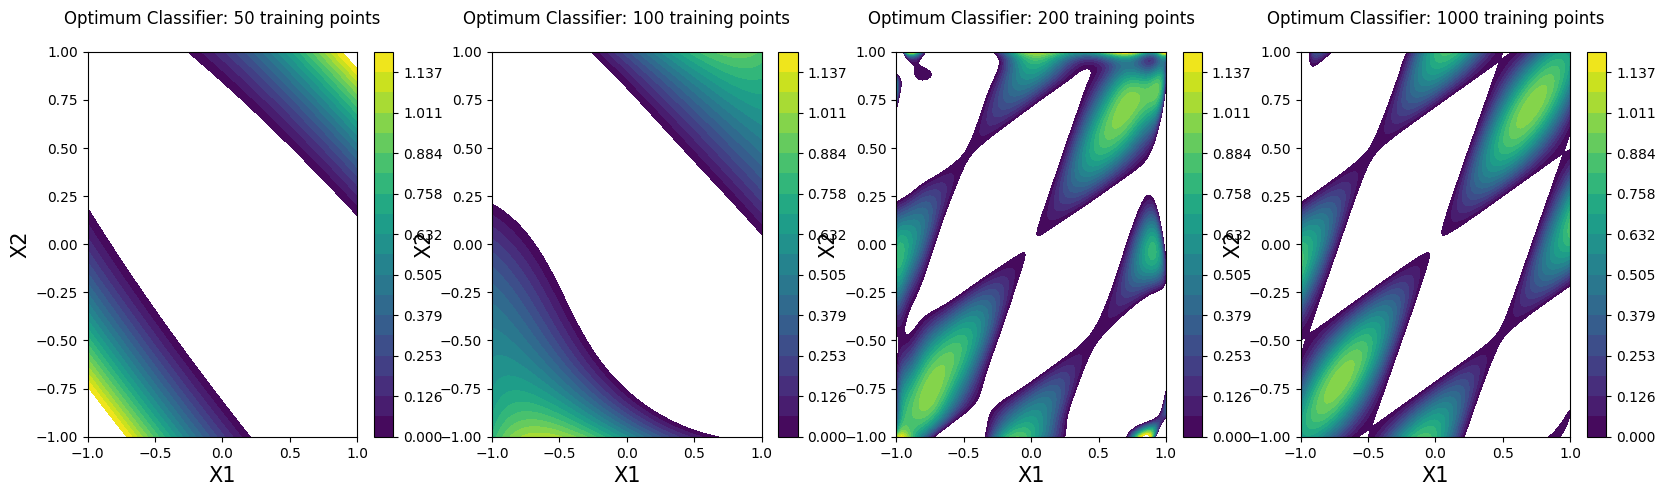

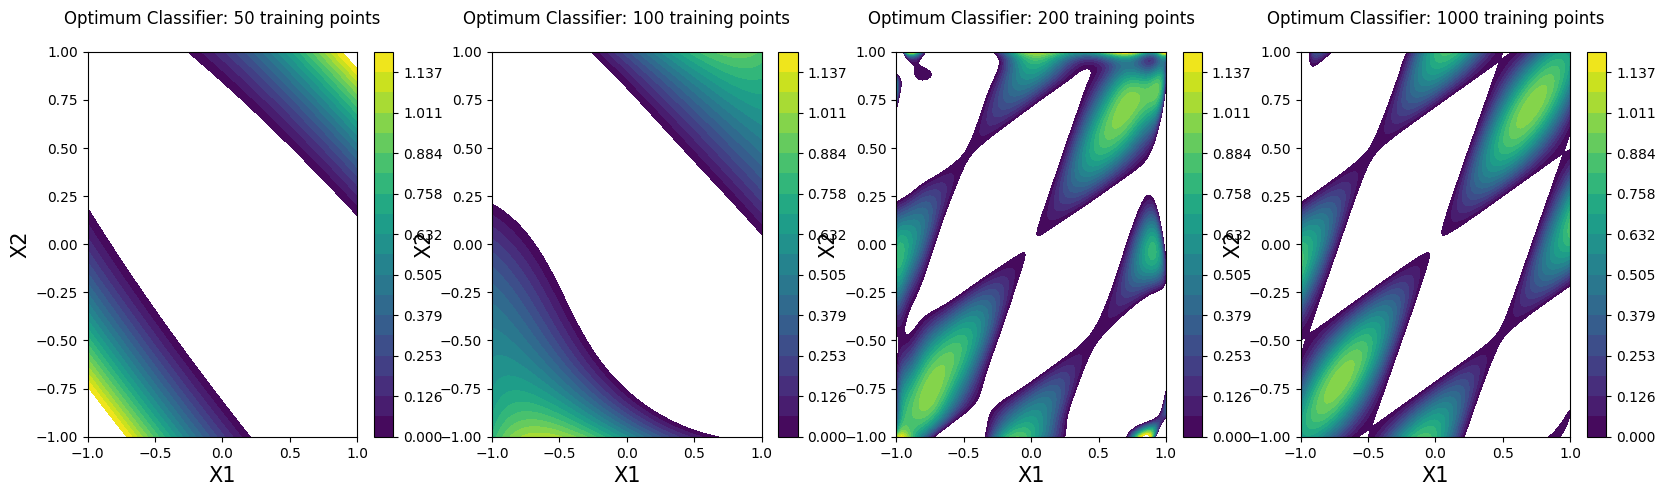

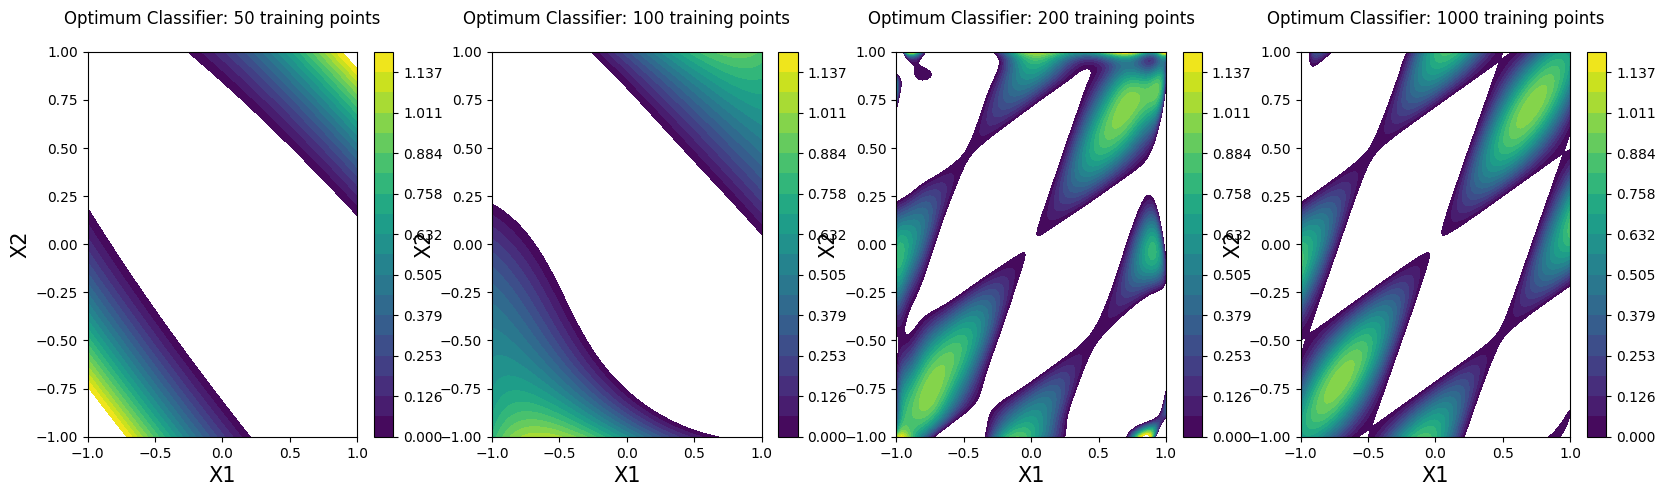

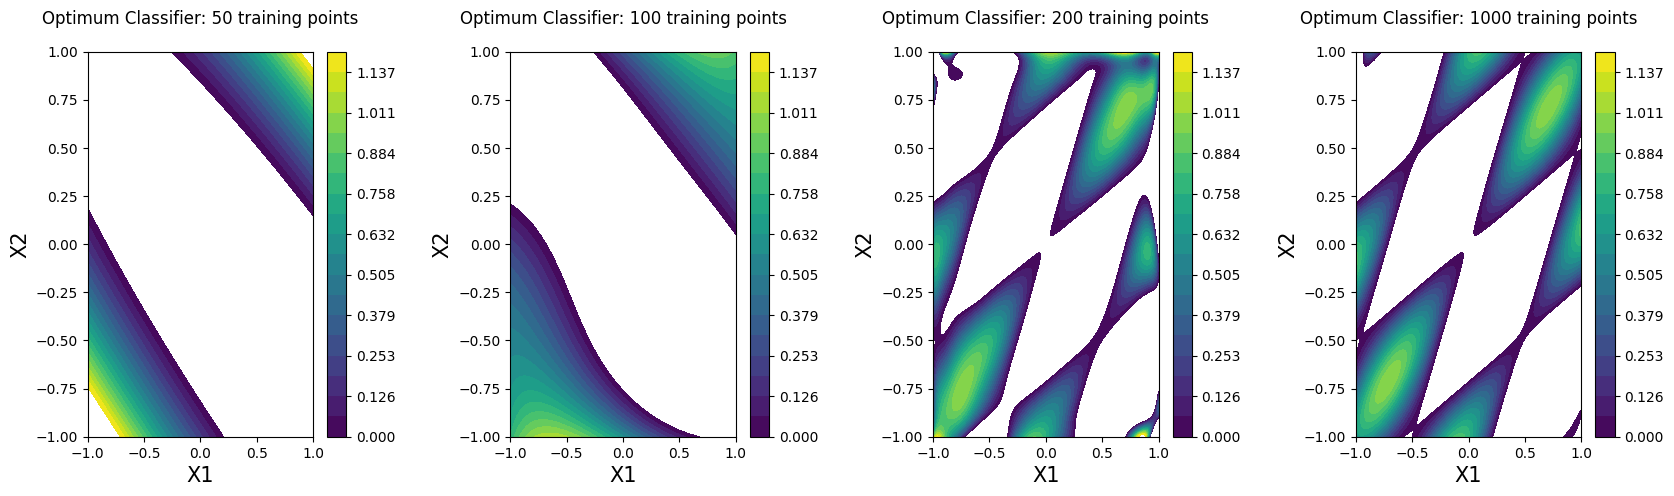

In [21]:
# Cell type : CodeWrite
#
def plot_ridge_regress_train(X_train, Y_train, degree=1, reg_param=0.01):
    """Trains a ridge regression model using the given data
        @returns w a 1D numpy array of shape (n_features,) containing the learned model parameters
    """

    # Generate polynomial features manually
    num_samples = X_train.shape[0]
    num_features = int((degree + 1) * (degree + 2) / 2)  # Calculate number of features

    phi = np.ones((num_samples, num_features))  # Initialize feature matrix

    col_index = 0
    for i in range(degree + 1):
        for j in range(degree + 1 - i):
            phi[:, col_index] = (X_train[:, 0] ** i) * (X_train[:, 1] ** j)
            col_index += 1

    # Calculate weight vector using ridge regression formula
    K = phi.T @ phi
    I = np.eye(num_features)
    w = np.linalg.solve(K + reg_param * I, phi.T @ Y_train)

    return w

######################################################################

def plot_ridge_regress_predict(X_test, wt_vector, degree=1):
    """Predicts output targets using the previously trained model and NumPy."""

    # Generate polynomial features for test data
    num_samples = X_test.shape[0]
    num_features = int((degree + 1) * (degree + 2) / 2)  # Calculate number of features

    phi = np.ones((num_samples, num_features))  # Initialize feature matrix

    col_index = 0
    for i in range(degree + 1):
        for j in range(degree + 1 - i):
            phi[:, col_index] = (X_test[:, 0] ** i) * (X_test[:, 1] ** j)
            col_index += 1

    # Predict using the calculated weight vector
    Y_test_pred = phi @ wt_vector

    return Y_test_pred

##########################################################################

def visualize_polynomial_contour(weights, poly_degree, title=""):
    """
    Plots a 2D contour map of the polynomial function defined by the given weights and degree.
    Expectation : Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels
    """
    grid_x = np.linspace(-1, 1, 200)
    grid_y = np.linspace(-1, 1, 200)
    X, Y = np.meshgrid(grid_x, grid_y)

    Z_values = np.zeros_like(X)

    for row_idx, _ in enumerate(X):
        input_points = np.column_stack((X[row_idx, :], Y[row_idx, :]))
        Z_values[row_idx, :] = plot_ridge_regress_predict(input_points, weights, poly_degree)

    # plt.figure()
    plt.contourf(X, Y, Z_values, levels=np.linspace(0., 1.2, 20), cmap='viridis')
    plt.colorbar()
    plt.title(title)
    # plt.show()

    ####################################################################
def generate_mse_matrices(degrees, regularization_values):
    """
    Creates a list of zero-filled 2D numpy arrays to store mean squared errors.

    Args:
        degrees (list): A list of integers specifying the polynomial degrees to be used.
        regularization_values (list): A list of floats specifying the regularization parameters to be used.

    Returns:
        mse_matrices (list): A list of 2D numpy arrays of shape (len(degrees), len(regularization_values)) filled with zeros.
    """
    return [np.zeros((len(degrees), len(regularization_values))) for _ in range(8)]

    #########################################################################

def train_and_evaluate_ridge(X_train, Y_train, X_test, Y_test, poly_degree, reg_param):
    """
    Trains a ridge regression model using the given training data and regularization parameter,
    then computes the predicted output, weight vector, and mean squared error (MSE) using the test data.

    Takes the following arguments :
        X_train (ndarray): Training input features (shape: (n_train_samples, 2)).
        Y_train (ndarray): Training output targets (shape: (n_train_samples,)).
        X_test (ndarray): Test input features (shape: (n_test_samples, 2)).
        Y_test (ndarray): True test output targets (shape: (n_test_samples,)).
        poly_degree (int): Polynomial degree for feature transformation.
        reg_param (float): Regularization parameter for ridge regression.

    Returns:
        weight_vector (ndarray): Learned model parameters (shape: (n_features,)).
        predicted_Y (ndarray): Predicted output targets for the test set (shape: (n_test_samples,)).
        mse (float): Mean squared error between predicted and true test targets.
    """
    weight_vector = plot_ridge_regress_train(X_train, Y_train, poly_degree, reg_param)
    predicted_Y = plot_ridge_regress_predict(X_test, weight_vector, poly_degree)
    mse = np.mean((predicted_Y - Y_test) ** 2)

    return weight_vector, predicted_Y, mse

###############################################################################

def plot_polynomial_classifier(subplot_position, weight_vector, training_size, title_padding, font_size, polynomial_degree):
    """
    Plots a 2D polynomial classifier visualization for the given weight vector, polynomial degree,
    and training sample size at the specified subplot position.

    Args:
        subplot_position (int): Position index in the 1x4 grid of subplots.
        weight_vector (ndarray): Learned model parameters (shape: (n_features,)).
        training_size (int): Number of training samples used to train the model.
        title_padding (float): Padding distance of the subplot title from the top in points.
        font_size (int): Font size for x and y axis labels.
        polynomial_degree (int): Polynomial degree used in the model.

    Returns:
        None.
    """
    # Create a single figure with subplots
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns of subplots

    # Plot classifier results
    for idx, (opt_wt, size, deg, ax) in enumerate(zip(opt_weight_vectors, training_sizes, optimal_degrees, axes), start=1):
        plt.sca(ax)  # Set the current subplot
        visualize_polynomial_contour(opt_wt, deg, title=f"Optimum Classifier: {size} training points")
        plt.title(f"Optimum Classifier: {size} training points", pad=20)
        plt.xlabel('X1', fontsize=15)
        plt.ylabel('X2', fontsize=15)

def display_mse_results(*mse_values):
    """
    Prints the mean squared errors (MSEs) for different test and training dataset sizes.

    Args:
        mse_values (tuple of ndarrays): MSEs for test and training datasets with different numbers of points.
    """
    dataset_sizes = [50, 100, 200, 1000]
    print("MSE for different dataset sizes:")
    print("--------------------------------")
    for i, size in enumerate(dataset_sizes):
        print(f"{size} Points - TEST Dataset:\n {mse_values[i]}")
        print(f"{size} Points - TRAIN Dataset:\n {mse_values[i+4]}")
########################### func definations end here ####################

# data = np.load('./dataset3_1.npz')
data = np.load('../../Data/dataset3_1.npz')

X_train, Y_train, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

# given values
degree_values = [1, 2, 4, 8, 16]
reg_params = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]

# Define subsets of training data with different sample sizes
training_sizes = [50, 100, 200, 1000]
training_subsets = [(X_train[:size, :], Y_train[:size]) for size in training_sizes]

# Initialize MSE matrices
mse_matrices = generate_mse_matrices(degree_values, reg_params)
MSE_test = mse_matrices[:4]
MSE_train = mse_matrices[4:]

# Compute MSE for all combinations of degree and regularization
for i, degree in enumerate(degree_values):
    for j, reg_param in enumerate(reg_params):
        for k, (X_subset, Y_subset) in enumerate(training_subsets):
            MSE_test[k][i, j] = train_and_evaluate_ridge(X_subset, Y_subset, X_test, Y_test, degree, reg_param)[2]
            MSE_train[k][i, j] = train_and_evaluate_ridge(X_subset, Y_subset, X_train, Y_train, degree, reg_param)[2]

# Compute optimal weight vectors for different datasets
optimal_degrees = [2, 4, 16, 16]
optimal_regs = [1e-1, 1e-7, 1e-9, 1e-9]
opt_weight_vectors = [plot_ridge_regress_train(X, Y, d, r) for (X, Y), d, r in zip(training_subsets, optimal_degrees, optimal_regs)]

# Plot classifier results
plt.rcParams['figure.figsize'] = [30, 8]
# fig = plt.figure()
for idx, (opt_wt, size, deg) in enumerate(zip(opt_weight_vectors, training_sizes, optimal_degrees), start=1):
    plot_polynomial_classifier(idx, opt_wt, size, title_padding=20, font_size=15, polynomial_degree=deg)

plt.subplots_adjust(wspace=0.50) # Adjust spacing between subplots
plt.show()

# Uncomment the line below to print MSE values if needed
# display_mse_results(*MSE_test, *MSE_train)


# #################################### test  - TO BE REMOVED
# import pandas as pd
# def create_mse_table(mse_matrix):
#     return pd.DataFrame(mse_matrix, index=degree_values, columns=reg_params)

# # Create tables for train and test errors:
# for size, test_mse, train_mse in zip(training_sizes, MSE_test, MSE_train):
#     print(f"Training Size: {size}")
#     print("Test Error:")
#     display(create_mse_table(test_mse))
#     print("Train Error:")
#     display(create_mse_table(train_mse))
#     print("\n")



Findings of Question 3 :

-  With greater polynomial degree training error comes down but test error seems to go high , which means overfitting with the training data . Regularization helps to penalize overfitting by penalizing large weights and improving generalization

- training size decreases =  both train and test error decreases , larger data = more information for the model to learn from leading to more generalization opportunities
- we have bias variance trade off : Simple models (low degree, high regularization) have higher bias but lower variance, while complex models (high degree, low regularization) have lower bias but higher variance.

1. 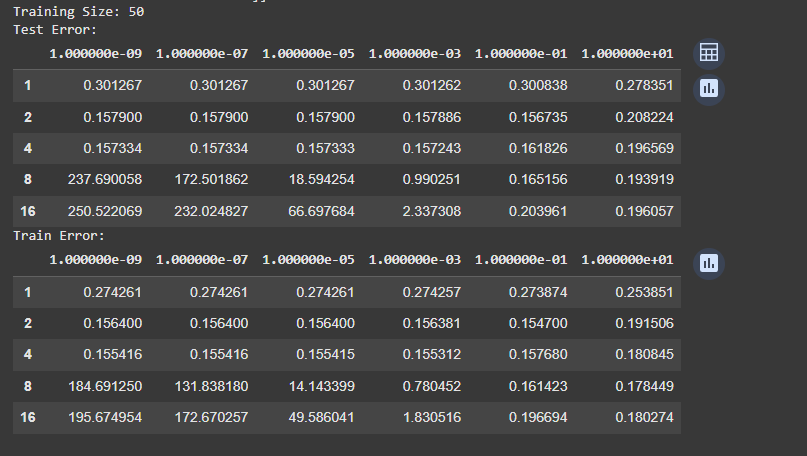

----------------------------------------------
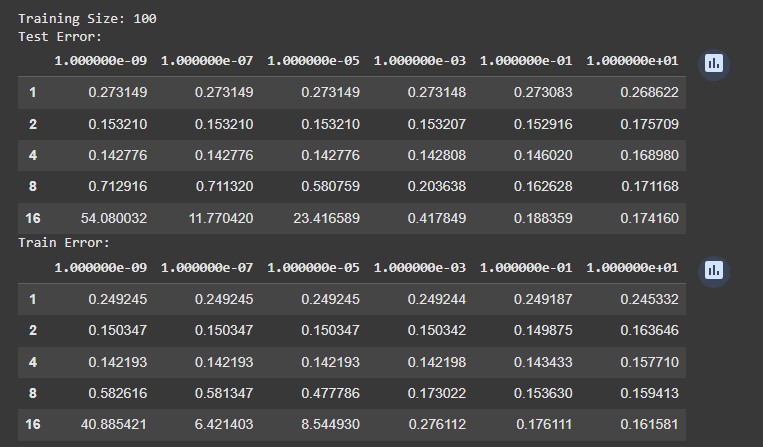
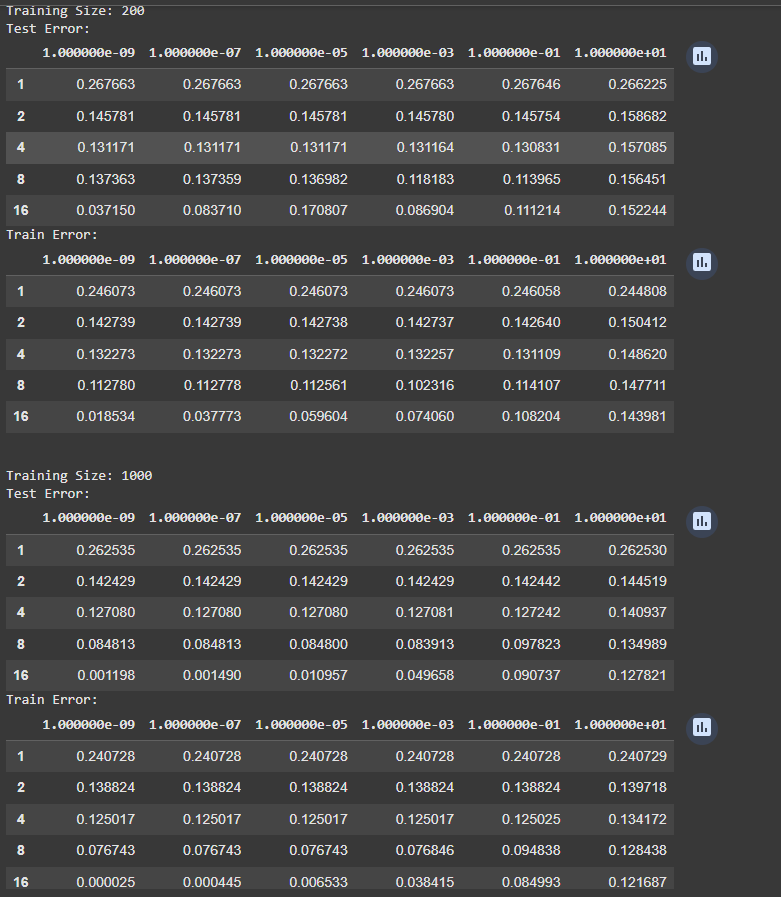



**Cell type : TextRead**


# Problem 4 : Bayesian Regression


Consider the 2-dimensional regression dataset with 4 training points given below:

(x1,   x2)   : y

(1.0, 2.0)  : 5.1

(2.0, 2.1)  : 6.1

(0.6, 1.5)  : 4.2

(1.1, 0.9)  : 2.9

Assume $Y_i=W.X_i + \epsilon_i$, where W is a random variable with prior distribution given by a Gaussian with mean $[\mu_1, \mu_2]$ and covariance given by $\tau^2*I$. The random variables $\epsilon_i$ are independent, and normally distributed with variance $\sigma^2$. For each of the settings below, give the contours of the prior distribution and posterior distribution of $W$ given the 4 data points. Plot using a contour map.

1. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=1$
2. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=1$
3. $\mu_1=\mu_2=0$ and $\tau^2=1$, and $\sigma^2=10$
4. $\mu_1=\mu_2=0$ and $\tau^2=10$, and $\sigma^2=10$
5. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=1$
6. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=1$
7. $\mu_1=\mu_2=5$ and $\tau^2=1$, and $\sigma^2=10$
8. $\mu_1=\mu_2=5$ and $\tau^2=10$, and $\sigma^2=10$

Repeat all the above experiments also with 400 data points, which are simply the 4 data points above repeated 100 times each.

A total of 16\*2 contour plots are to be given.

Summarise your findings and conclusions in the final textcell. e.g. what happens when tau, sigma and number of data points are increased.

Hint 1: In class we saw the expression for posterior of W, but only used it to find the MAP estimate. But it can be analysed in greater detail. You may read up classic textbooks like Bishop to figure out the posterior or work it out yourself. This is not too hard.

Hint 2: In particular, observe that the posterior looks like a product of exponential functions, and the term inside the exponent is always a degree 2 (or less) function of w. Can you think of any distribution which looks like that?











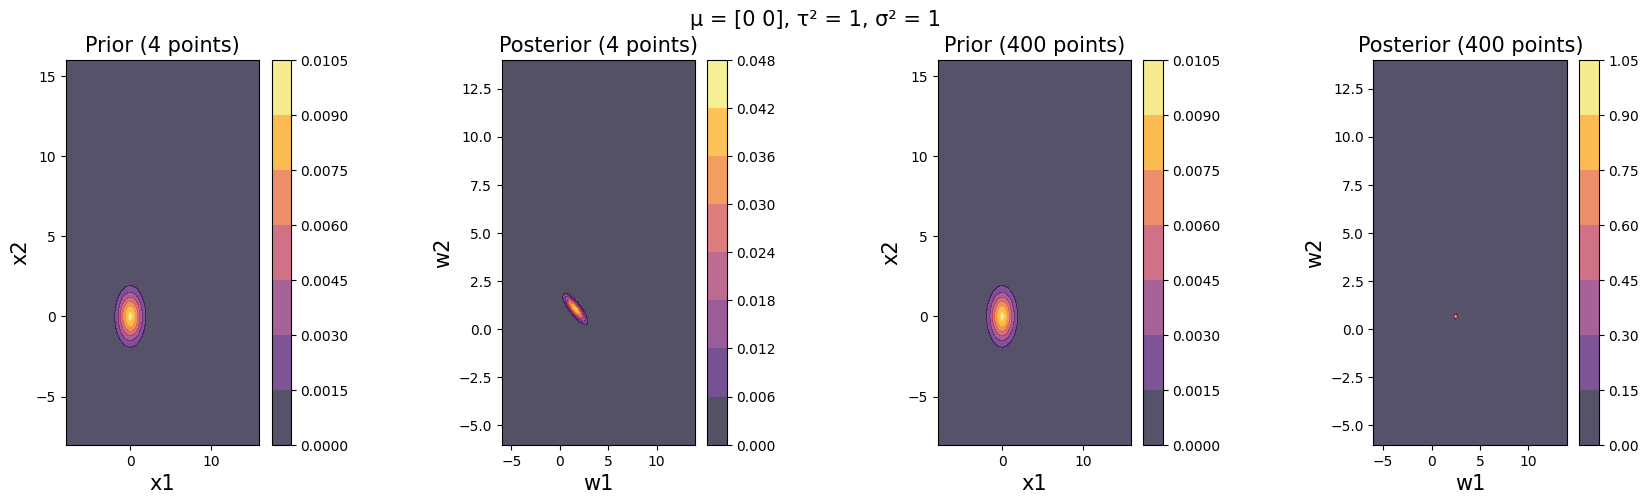

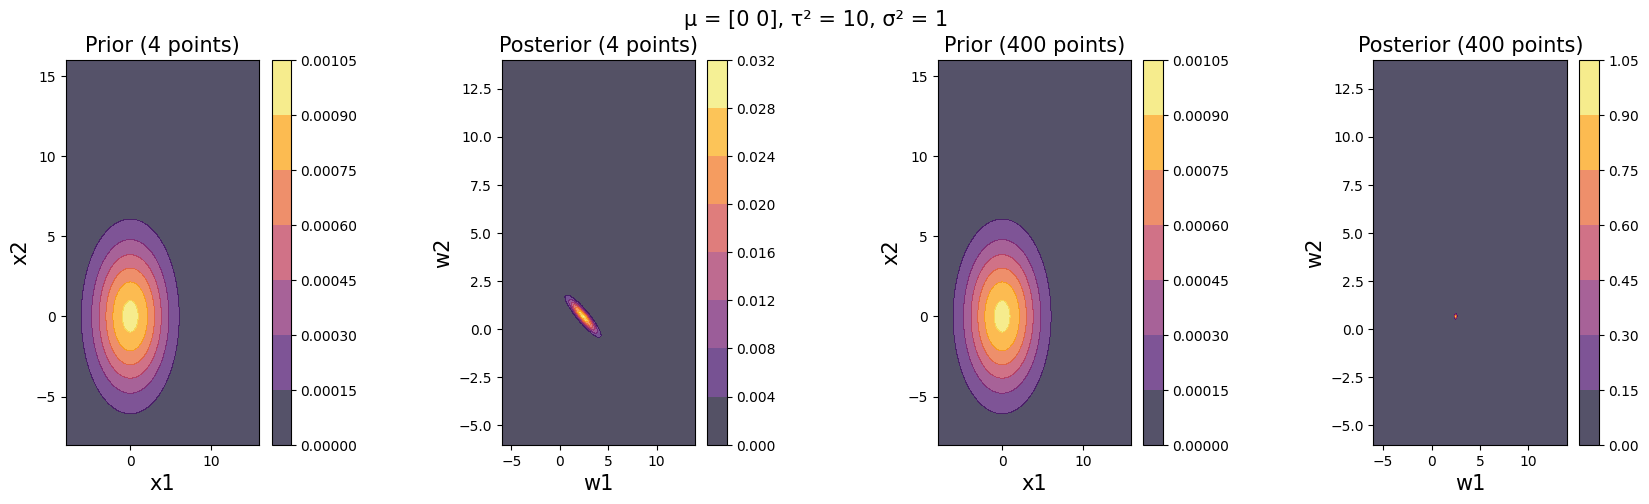

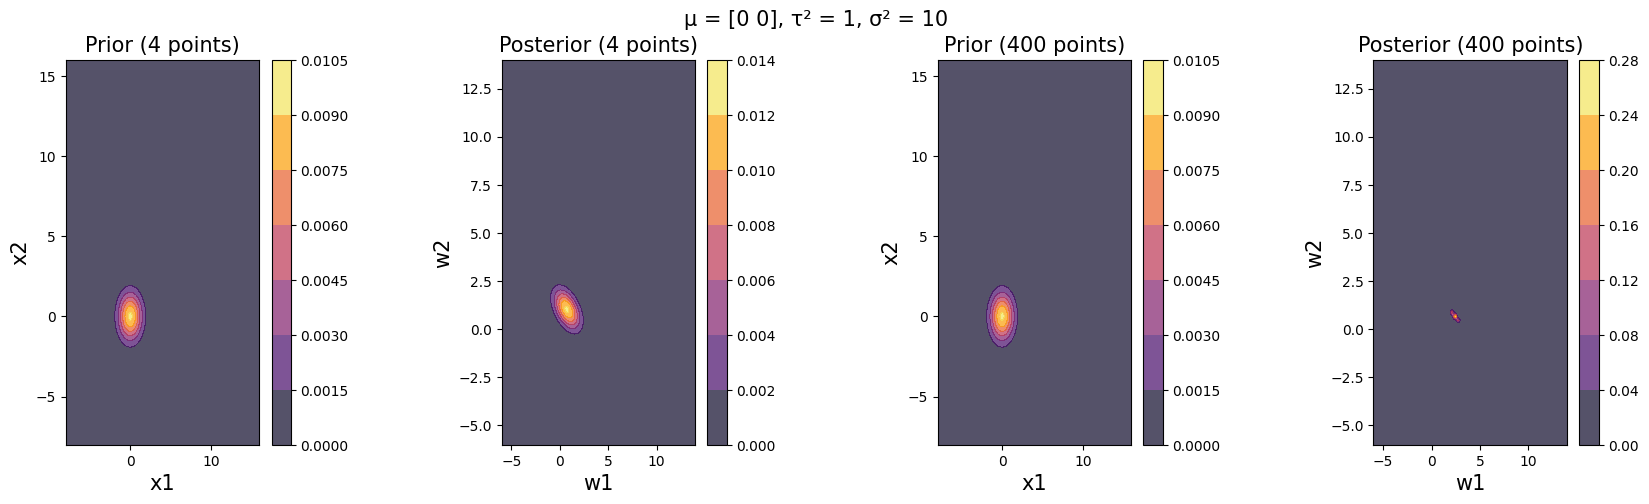

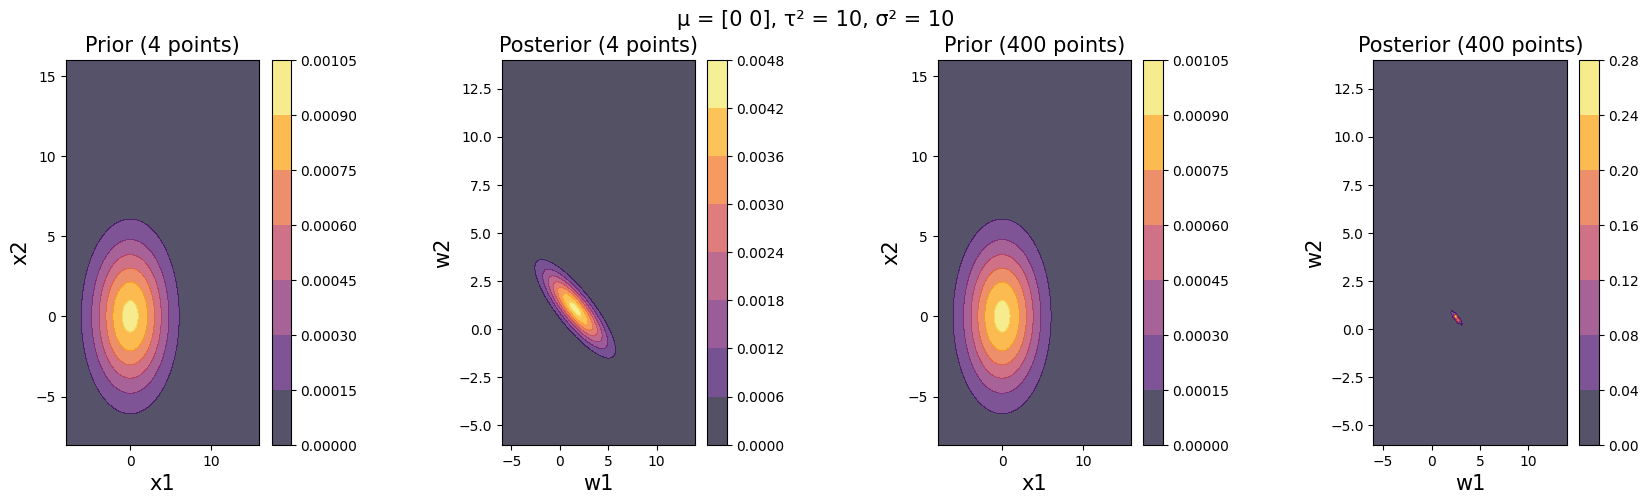

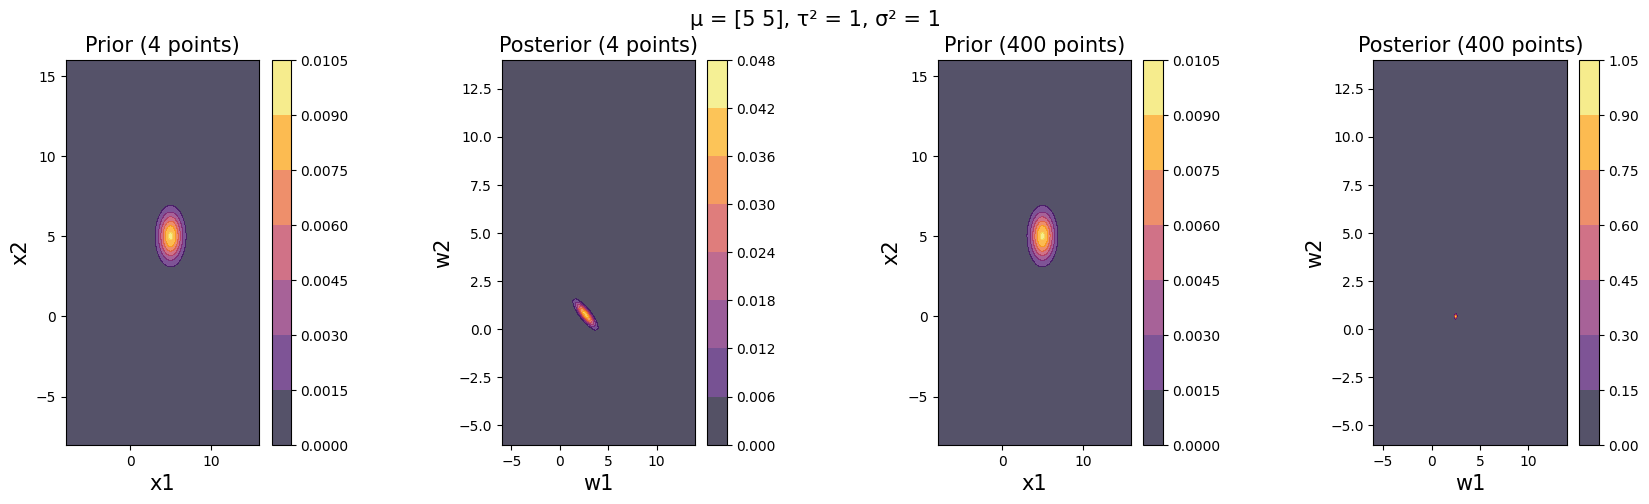

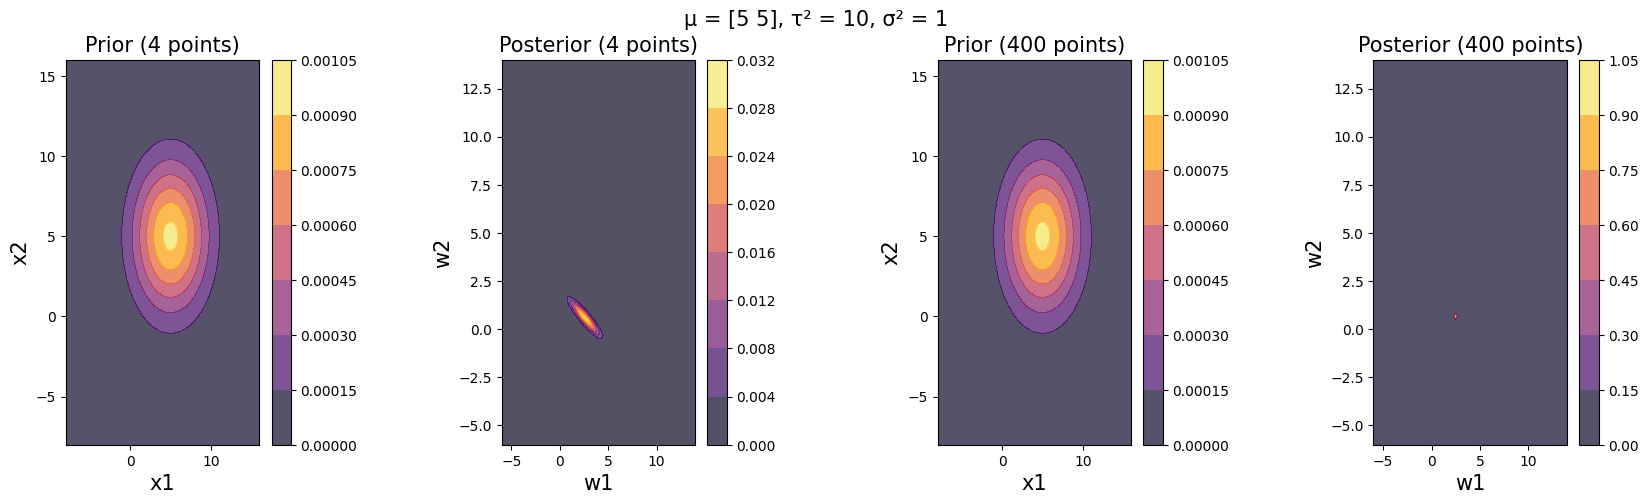

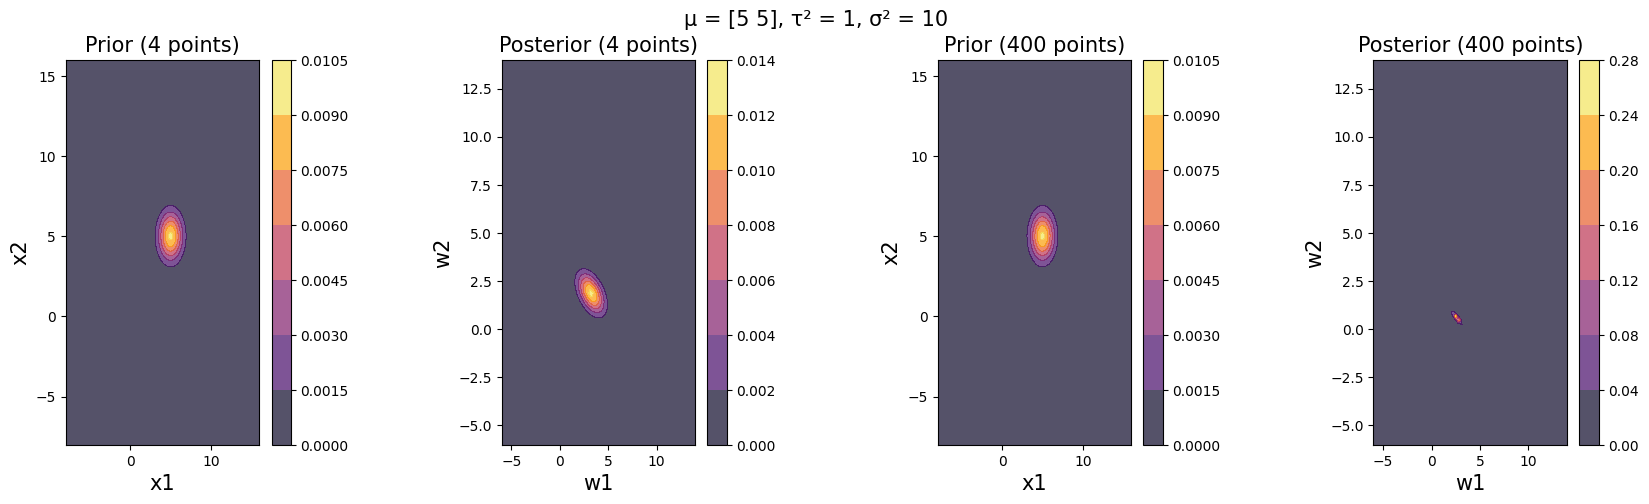

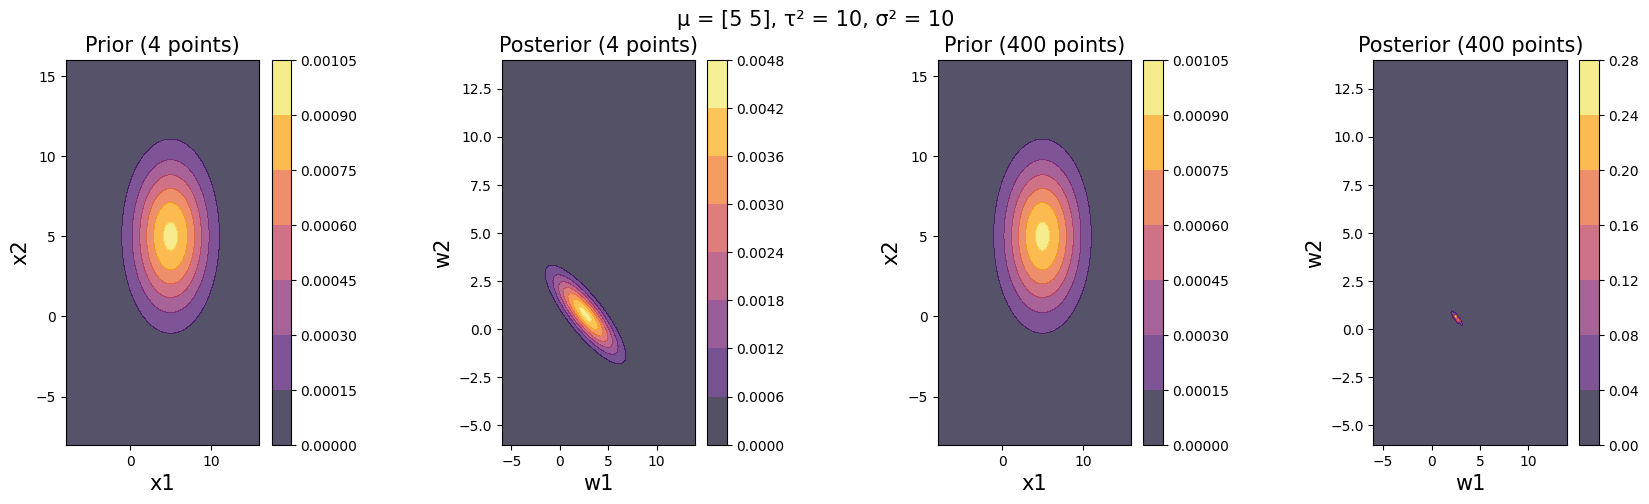

In [22]:
# Cell type : CodeWrite

# assuming the prior distribution to be Gaussian
# P(W∣Y)∝P(Y∣W)P(W)

def plot_graph(fig, ax, X1, X2, data, cmap, alpha_plot, loc, xlbl, ylbl, font, title):
    """Plots a contour plot on a given axis object."""
    contour = ax[loc].contourf(X1, X2, data / np.sum(data), alpha=alpha_plot, cmap=cmap)
    fig.colorbar(contour, ax=ax[loc])
    ax[loc].set_xlabel(xlbl, fontsize=font)
    ax[loc].set_ylabel(ylbl, fontsize=font)
    ax[loc].set_title(title, fontsize=font)

# Define parameters
cmap, alpha_plot = 'inferno', 0.7

# given values
X1 = np.array([[1, 2], [2, 2.1], [0.6, 1.5], [1.1, 2.9]])
Y1 = np.array([5.1, 6.1, 4.2, 2.9])

X2 = np.vstack([np.tile(X1[i, :], (100, 1)) for i in range(4)])
Y2 = np.hstack([np.full(100, Y1[i]) for i in range(4)])

mu_values = np.array([0, 5])
variance_values = np.array([1, 10])
tau_squared_values = np.array([1, 10])

# Create grids
x_range = np.linspace(-8, 16, 100)
w_range = np.linspace(-6, 14, 100)
XAxis1, XAxis2 = np.meshgrid(x_range, x_range)
Weight_1, Weight_2 = np.meshgrid(w_range, w_range)

# Compute probability distributions
def compute_prior(X1, X2, mu, tau_sq):
    X = np.stack([X1.ravel(), X2.ravel()], axis=1)
    covariance = tau_sq * np.eye(2)
    diff = X - mu
    exponent = -0.5 * np.sum(diff @ np.linalg.inv(covariance) * diff, axis=1)
    prior = (1 / (2 * np.pi * np.linalg.det(covariance) ** 0.5)) * np.exp(exponent)
    return prior.reshape(X1.shape)

def compute_posterior(Y, X, mu, var, tau_sq):
    W = np.stack([Weight_1.ravel(), Weight_2.ravel()], axis=1)
    diff = Y[:, None] - X @ W.T
    norm_term = np.linalg.norm(diff, axis=0) ** 2
    reg_term = np.linalg.norm(W - mu, axis=1) ** 2
    posterior = np.exp(-0.5 * ((1 / var) * norm_term + (1 / tau_sq) * reg_term))
    return posterior.reshape(Weight_1.shape)

# Plot distributions
plt.rcParams['figure.figsize'] = [20, 5]
for mu_2 in mu_values:
    for var in variance_values:
        for tau_sq in tau_squared_values:
            mu = np.array([mu_2, mu_2])

            prior_4 = compute_prior(XAxis1, XAxis2, mu, tau_sq)
            prior_400 = compute_prior(XAxis1, XAxis2, mu, tau_sq)
            posterior_4 = compute_posterior(Y1, X1, mu, var, tau_sq)
            posterior_400 = compute_posterior(Y2, X2, mu, var, tau_sq)

            fig, ax = plt.subplots(1, 4)
            fig.suptitle(f'μ = {mu}, τ² = {tau_sq}, σ² = {var}', fontsize=15)

            plot_graph(fig, ax, XAxis1, XAxis2, prior_4, cmap, alpha_plot, 0, 'x1', 'x2', 15, 'Prior (4 points)')
            plot_graph(fig, ax, Weight_1, Weight_2, posterior_4, cmap, alpha_plot, 1, 'w1', 'w2', 15, 'Posterior (4 points)')
            plot_graph(fig, ax, XAxis1, XAxis2, prior_400, cmap, alpha_plot, 2, 'x1', 'x2', 15, 'Prior (400 points)')
            plot_graph(fig, ax, Weight_1, Weight_2, posterior_400, cmap, alpha_plot, 3, 'w1', 'w2', 15, 'Posterior (400 points)')

            fig.subplots_adjust(wspace=0.8)
            plt.show()

Conclusions from Problem 4 :

**Effect of Increasing τ² (Prior Variance)**:Larger τ² results in a wider prior distribution for W. The posterior is more dispersed unless the data strongly supports a particular estimate of W.

**Effect of Increasing σ²(Noise Variance)**: Higher σ² means noisier observations, making the posterior distribution broader.This reduces confidence in the estimated W.

**Effect of Increasing Data Points (4 vs. 400**): More data points lead to a sharper posterior, meaning greater certainty in W. The posterior variance shrinks, making estimates more reliable.

When τ² is large, the prior dominates, and the posterior is more dispersed.
When σ² is large, the likelihood is weak, leading to more uncertainty in W.

As τ² increases (weaker prior), the posterior becomes more influenced by the data

As σ² increases (noisier data), the posterior becomes more spread out

With more data points (400 vs 4), the posterior becomes more concentrated around the true parameters

The prior mean (μ) affects the posterior when we have few data points but becomes less important with more data



**Cell type : TextRead**

# 5. Logistic Regression

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set).

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For each given hyperparameter setting (kernel and regularisation) you will have to do some exploring to find the right learning rate to use in gradient descent. The optimisation learning rate is not a model hyperparameter and hence can be chosen based on just the training set. i.e. choose the learning rate for which the training loss decreases the most.

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [27]:
# CodeWrite
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here

def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0.,
                                   kernel_param=1., num_iter_gd=100):
    # """
    # Arguments:
    # X : (n,d) shape numpy array
    # Y : (n,)  shape numpy array
    # X_test : (m,d) shape numpy array
    # kernel = 'linear' or 'rbf' or 'poly'
    # reg_param = $\lambda$
    # num_iter_gd = number of GD iterations.

    # Returns the result of kernel logistic regression :
    # alpha: Vector of solutions for the dual. Numpy array of shape (n,)

    # Primal problem:
    # $ \min_w  \sum_{i=1}^n \log(1+\exp(-y_i* \w^\top \phi(\x_i)))  + \frac{\lambda}{2} ||\w||^2 $

    # the dual of which is

    # $ \min_alpha \sum_{i=1}^n \log(1+\exp(-y_i* \alpha^\top K_{:,i} ))  + \frac{\lambda}{2} \alpha^\top K \alpha $
    # where $\phi$ is the feature got by the kernel.

    # Where K is the nxn kernel matrix computed on the training data.

    # The kernel is defined by the kernel_param:
    # If kernel=linear: K(\u,\v) = \u^\top \v
    # If kernel=poly:  K(\u,\v) = (1+\u^\top \v)^(kernel_param)
    # If kernel=rbf:  K(\u,\v) = \exp(-kernel_param*||\u-\v||^2)
    # """
    n, d = X.shape
    alpha = np.zeros(n)
    learning_rate = 0.1  # Initial learning rate

    # Define kernel function
    def kernel_func(x1, x2):
        if kernel == 'linear':
            return x1 @ x2
        elif kernel == 'rbf':
            return np.exp(-np.linalg.norm(x1 - x2)**2 / (2 * (kernel_param**2)))
        elif kernel == 'poly':
            return (x1 @ x2 + 1)**kernel_param
        else:
            raise ValueError("Invalid kernel type. Choose 'linear', 'rbf', or 'poly'.")

    # Gradient Descent
    for k in range(num_iter_gd):
        # Calculate predictions
        predictions = np.zeros(n)
        for i in range(n):
            for j in range(n):
                predictions[i] += alpha[j] * Y[j] * kernel_func(X[j], X[i])
            predictions[i] = 1 / (1 + np.exp(-predictions[i]))

        # Update alpha
        gradient = np.zeros(n)
        for i in range(n):
            gradient[i] = -(1 - predictions[i]) * Y[i]

        # Regularization term for the gradient
        gradient_reg = reg_param * np.sum(alpha * Y[:, None] * kernel_func(X, X[None]), axis=0)

        gradient = gradient + gradient_reg
        alpha -= learning_rate * gradient

    return alpha



def test_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):
    """
    Arguments:
    alpha: Vector of solutions for the dual. Numpy array of shape (n,)
    train_X : (n,d) shape numpy array
    train_Y : (n,)  shape numpy array
    test_X : (m,d) shape numpy array
    kernel = 'linear' or 'rbf' or 'poly'
    kernel_param = kernel parameter (if any)

    Returns :
    Y_test_pred : (m,) shape numpy array
    """
    m, d = test_X.shape
    n = train_X.shape[0]

    # Define kernel function (same as in train_pred_logistic_regression)
    def kernel_func(x1, x2):
        if kernel == 'linear':
            return x1 @ x2
        elif kernel == 'rbf':
            return np.exp(-np.linalg.norm(x1 - x2)**2 / (2 * (kernel_param**2)))
        elif kernel == 'poly':
            return (x1 @ x2 + 1)**kernel_param
        else:
            raise ValueError("Invalid kernel type. Choose 'linear', 'rbf', or 'poly'.")

    # Make predictions
    Y_pred = np.zeros(m)  # Initialize prediction array
    for i in range(m):  # Iterate over test samples
        prediction = 0  # Initialize prediction for current test sample
        for j in range(n):  # Iterate over training samples
            prediction += alpha[j] * train_Y[j] * kernel_func(train_X[j], test_X[i])
        Y_pred[i] = np.sign(prediction)  # Get sign of the prediction to determine class label

    return Y_pred





In [29]:
# CodeWrite : Use the functions above to do validation to get best hyperparameters
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below.

def choose_hyperparameters_logistic_regression(X, Y, kernel='linear'):

    best_reg_param = 0
    best_kernel_param = 1
    min_val_error = float('inf')

    # Split data into training and validation sets using NumPy
    num_samples = X.shape[0]
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    split_index = int(0.8 * num_samples)  # 80% for training, 20% for validation
    train_indices = indices[:split_index]
    val_indices = indices[split_index:]
    X_train, X_val = X[train_indices], X[val_indices]
    Y_train, Y_val = Y[train_indices], Y[val_indices]

    reg_params = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]
    kernel_params = [1e-2, 1e-1, 1, 1e1, 1e2] # For poly and rbf kernels

    for reg_param in reg_params:
        if kernel == 'linear':
            # Train and predict using the current hyperparameters
            alpha = train_pred_logistic_regression(X_train, Y_train, kernel=kernel, reg_param=reg_param)
            Y_pred_val = test_pred(alpha, X_train, Y_train, X_val, kernel=kernel, kernel_param=1.0) # kernel_param is not used for linear kernel

            # Calculate validation error and update best hyperparameters if necessary
            val_error = 1 - np.mean(Y_pred_val == Y_val)
            if val_error < min_val_error:
                min_val_error = val_error
                best_reg_param = reg_param

        else:
            for kernel_param in kernel_params:
                # Train and predict using the current hyperparameters
                alpha = train_pred_logistic_regression(X_train, Y_train, kernel=kernel, reg_param=reg_param, kernel_param=kernel_param)
                Y_pred_val = test_pred(alpha, X_train, Y_train, X_val, kernel=kernel, kernel_param=kernel_param)

                # Calculate validation error and update best hyperparameters if necessary
                val_error = 1 - np.mean(Y_pred_val == Y_val)
                if val_error < min_val_error:
                    min_val_error = val_error
                    best_reg_param = reg_param
                    best_kernel_param = kernel_param

    return best_reg_param, best_kernel_param



TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  




In [43]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

def visualize_logistic_regression(X_train, Y_train, kernel='linear', reg_param=0., kernel_param=1.):
    """Visualizes the decision boundary of a trained logistic regression classifier."""

    # Fit the model
    alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg_param, kernel_param)

    # Create a meshgrid for plotting
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict on the meshgrid
    Z = test_pred(alpha, X_train, Y_train, np.c_[xx.ravel(), yy.ravel()], kernel, kernel_param)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and data points
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolors='k')
    plt.title(f"Logistic Regression with {kernel} kernel")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Load datasets
dataset_A = np.load('./dataset_A.npz')
dataset_B = np.load('./dataset_B.npz')

# dataset_A = np.load('../../Data/dataset_A.npz')
# dataset_B = np.load('../../Data/dataset_B.npz')


# X_train_A, Y_train_A, X_test_A, Y_test_A = dataset_A['arr_0'], dataset_A['arr_1'], dataset_A['arr_2'], dataset_A['arr_3']
# X_train_B, Y_train_B, X_test_B, Y_test_B = dataset_B['arr_0'], dataset_B['arr_1'], dataset_B['arr_2'], dataset_B['arr_3']

# # Choose hyperparameters for each kernel and dataset
# best_reg_param_linear_A, _ = choose_hyperparameters_logistic_regression(X_train_A, Y_train_A, kernel='linear')
# best_reg_param_rbf_A, best_kernel_param_rbf_A = choose_hyperparameters_logistic_regression(X_train_A, Y_train_A, kernel='rbf')
# best_reg_param_poly_A, best_kernel_param_poly_A = choose_hyperparameters_logistic_regression(X_train_A, Y_train_A, kernel='poly')

# best_reg_param_linear_B, _ = choose_hyperparameters_logistic_regression(X_train_B, Y_train_B, kernel='linear')
# best_reg_param_rbf_B, best_kernel_param_rbf_B = choose_hyperparameters_logistic_regression(X_train_B, Y_train_B, kernel='rbf')
# best_reg_param_poly_B, best_kernel_param_poly_B = choose_hyperparameters_logistic_regression(X_train_B, Y_train_B, kernel='poly')

# # Visualize the classifiers
# visualize_logistic_regression(X_train_A, Y_train_A, kernel='linear', reg_param=best_reg_param_linear_A)
# visualize_logistic_regression(X_train_A, Y_train_A, kernel='rbf', reg_param=best_reg_param_rbf_A, kernel_param=best_kernel_param_rbf_A)
# visualize_logistic_regression(X_train_A, Y_train_A, kernel='poly', reg_param=best_reg_param_poly_A, kernel_param=best_kernel_param_poly_A)

# visualize_logistic_regression(X_train_B, Y_train_B, kernel='linear', reg_param=best_reg_param_linear_B)
# visualize_logistic_regression(X_train_B, Y_train_B, kernel='rbf', reg_param=best_reg_param_rbf_B, kernel_param=best_kernel_param_rbf_B)
# visualize_logistic_regression(X_train_B, Y_train_B, kernel='poly', reg_param=best_reg_param_poly_B, kernel_param=best_kernel_param_poly_B)
# visualize_logistic_regression(X_train_A, Y_train_A, kernel='rbf', reg_param=best_reg_param_rbf_A, kernel_param=best_kernel_param_rbf_A)


**Cell type : TextRead**

# 6. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [2]:
# CodeWrite cell
# Write Decision tree classifier from scratch,
# write only functions here (you may write extra functions here if you wish)

def entropy(p):
    """Computes binary entropy."""
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p) if 0 < p < 1 else 0

def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy',node_id=0):
    """ Returns a decision tree trained on X and Y.
    Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Returns a tree (In whatever format that you find appropriate)
    My format -
    Returns:
        list: Tree represented as a list of tuples.
        int: Last node ID.
    """
    """Note : given function does not have node_id . I have modified the function defination to add it"""
    n_samples = X.shape[0]
    tree = []

    if n_samples == 0 or np.all(Y == 1) or np.all(Y == -1) or n_samples < num_nodes_stop:
        label = 1 if np.mean(Y) > 0 else -1
        tree.append((None, None, None, label))
        return tree, None

    X_left, Y_left, X_right, Y_right, best_feature, best_threshold = split_dataset(X, Y, criterion)

    tree.append((None, best_feature, best_threshold, None))

    left_tree, _ = train_decision_tree(X_left, Y_left, num_nodes_stop, criterion)
    right_tree, _ = train_decision_tree(X_right, Y_right, num_nodes_stop, criterion)

    return tree + left_tree + right_tree, None


def eval_decision_tree(tree, X):
    """ Takes in a tree, and a bunch of instances X and
    returns the tree predicted values at those instances."""

    Y_pred = np.ones(X.shape[0])

    for i in range(X.shape[0]):
        for node in tree:
            if node[3] is not None:
                Y_pred[i] = node[3]
                break
            feature, threshold = node[1], node[2]
            if X[i, feature] <= threshold:
                continue
            else:
                break

    return Y_pred

def split_dataset(X, Y, criterion):
    """
    Finds the best split for dataset based on accuracy or entropy.
    """
    best_gain = float('-inf') if criterion == 'accuracy' else float('inf')
    best_feature, best_threshold = None, None

    for feature in range(X.shape[1]):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            left_mask, right_mask = X[:, feature] < threshold, X[:, feature] >= threshold
            Y_left, Y_right = Y[left_mask], Y[right_mask]

            if len(Y_left) == 0 or len(Y_right) == 0:
                continue

            if criterion == 'accuracy':
                gain = (np.sum(Y_left == np.sign(np.sum(Y_left))) + np.sum(Y_right == np.sign(np.sum(Y_right)))) / len(Y)
                if gain > best_gain:
                    best_gain, best_feature, best_threshold = gain, feature, threshold
            else:
                p_left, p_right = len(Y_left) / len(Y), len(Y_right) / len(Y)
                entropy_gain = p_left * entropy(np.mean(Y_left > 0)) + p_right * entropy(np.mean(Y_right > 0))
                if entropy_gain < best_gain:
                    best_gain, best_feature, best_threshold = entropy_gain, feature, threshold

    left_mask, right_mask = X[:, best_feature] < best_threshold, X[:, best_feature] >= best_threshold
    return X[left_mask], Y[left_mask], X[right_mask], Y[right_mask], best_feature, best_threshold

def plot_decision_boundary(X, Y, tree, ax):
    """
    Plots the decision boundary for a 2D dataset using a trained decision tree.
    """
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
    Z = eval_decision_tree(tree, np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
    ax.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], marker='+', color='blue', label='Class 1')
    ax.scatter(X[Y == -1][:, 0], X[Y == -1][:, 1], marker='o', color='red', label='Class -1')
    ax.legend()
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Decision Tree Decision Boundary')

def load_data(filename):
    """
    Load and preprocess data from a NumPy file.
    Parameters
    ----------
    filename : str
        The name of the file to load.

    Returns
    -------
    tuple of ndarrays
        A tuple containing the following arrays:
        - X_train: a 2D array of training input data
        - Y_train: a 1D array of training output data
        - X_test: a 2D array of test input data
        - Y_test: a 1D array of test output data
        - X_val: a 2D array of validation input data
        - Y_val: a 1D array of validation output data
        - X_train_for_val: a 2D array of training input data without validation samples
        - Y_train_for_val: a 1D array of training output data without validation samples
    """
    data = np.load(filename)
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    np.random.seed(10)
    indices = np.random.choice(range(X_train.shape[0]), X_train.shape[0] // 5)
    X_val = X_train[indices,:]
    X_train_for_val = np.delete(X_train, indices, axis=0)
    Y_val = Y_train[indices]
    Y_train_for_val = np.delete(Y_train, indices, axis=0)
    return X_train, Y_train, X_test, Y_test, X_val, Y_val, X_train_for_val, Y_train_for_val

def print_result(dataset_Name,X_train, Y_train, X_test, Y_test, X_val, Y_val, X_train_for_val, Y_train_for_val,display_result=False):
    """
    Print the training and test accuracy and loss of decision trees trained on a dataset using different stopping criteria.

    Parameters:
    ----------
    - dataset_Name: str, name of the dataset
    - X_train: numpy array of shape (n_train, d), features of training set
    - Y_train: numpy array of shape (n_train,), labels of training set
    - X_test: numpy array of shape (n_test, d), features of test set
    - Y_test: numpy array of shape (n_test,), labels of test set
    - X_val: numpy array of shape (n_val, d), features of validation set
    - Y_val: numpy array of shape (n_val,), labels of validation set
    - X_train_for_val: numpy array of shape (n_train - n_val, d), features of training set for validation
    - Y_train_for_val: numpy array of shape (n_train - n_val,), labels of training set for validation
    - display_result: bool, optional, whether to display the result or not (default: False)

    Returns:
    ----------
    None
    """
    if display_result:
        print(f'\nDataset {dataset_Name}')
    for criterion in ['accuracy', 'entropy']:
        min_loss = 1
        for num_nodes_stop in [1, 10, 50, 100, 200]:
            tree, number_of_nodes = train_decision_tree(X_train_for_val, Y_train_for_val, num_nodes_stop, criterion)
            Y_pred_val = eval_decision_tree(tree, X_val)
            val_accuracy = np.sum(Y_pred_val == Y_val)/Y_val.shape[0]
            val_loss = 1 - val_accuracy
            if min_loss >= val_loss:
                min_loss = val_loss
                num_nodes_stop_opt = num_nodes_stop
        if display_result:
            print(f'\nCriterion: {criterion}')
            print(f'Best node size to stop: {num_nodes_stop_opt}')
        tree, number_of_nodes = train_decision_tree(X_train, Y_train, num_nodes_stop_opt, criterion)
        Y_pred_train = eval_decision_tree(tree, X_train)
        training_accuracy = np.sum(Y_pred_train == Y_train)/Y_train.shape[0]
        training_loss = 1 - training_accuracy
        Y_pred_test = eval_decision_tree(tree, X_train)
        test_accuracy = np.sum(Y_pred_test == Y_train)/Y_train.shape[0]
        test_loss = 1 - test_accuracy
        if display_result:
            print(f'Training Accuracy: {training_accuracy}')
            print(f'Training Loss: {training_loss}')
            print(f'Test Accuracy: {test_accuracy}')
            print(f'Test Loss: {test_loss}')

def plot_Graph(dataset,X_train, Y_train, X_test, Y_test, fig, ax, node_arr, alpha_scatter = 0.25,criterion='accuracy'):
    """
    Plots a decision tree classifier for the given dataset, with node sizes from a range of possible node sizes.

    Parameters:
    dataset (str): The name of the dataset being used.
    X_train (array-like): The training data input.
    Y_train (array-like): The training data output.
    X_test (array-like): The test data input.
    Y_test (array-like): The test data output.
    fig (figure): The figure object to plot on.
    ax (axis): The axis object to plot on.
    node_arr (array-like): An array of node sizes to test.
    alpha_scatter (float): The alpha value to use for scatter plot points. Default is 0.25.
    criterion (str): The criterion to use for determining the best split. Must be one of {'accuracy', 'entropy'}. Default is 'accuracy'.

    Returns:
    None
    """
    X_axis, Y_axis = np.meshgrid(np.arange(start = X_train[:, 0].min() - 0.5, stop = X_train[:, 0].max() + 0.5, step = 0.1),np.arange(start = X_train[:, 1].min() - 0.5, stop = X_train[:, 1].max() + 0.5, step = 0.1))
    X_test = np.array([X_axis.ravel(), Y_axis.ravel()]).T
    fig.suptitle(f'Decision Tree Classifier for {dataset}',fontweight='bold',fontsize=24)
    tree, number_of_nodes = train_decision_tree(X_train, Y_train, num_nodes_stop=node_arr[0], criterion=criterion)
    Y_pred = eval_decision_tree(tree, X_test)
    Z = Y_pred.reshape(X_axis.shape)
    ax.contourf(X_axis, Y_axis, Z, alpha = 0.5, colors = ['lightblue', 'palegreen'])
    ax.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1], color = 'green',alpha=alpha_scatter,label='1',marker = '+', s = 30)
    ax.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1], color = 'blue',alpha=alpha_scatter,label='-1',marker = 'o', s = 30)
    ax.legend(fontsize=12)
    ax.set_title(f'Dataset {dataset} (Node Size: {node_arr[0]})')
    ax.set_xlabel('$x_1$',fontsize=18)
    ax.set_ylabel('$x_2$',fontsize=18)
    plt.show()


In [7]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below.
# Repeat with criterion set to entropy also.

X_train2_A, Y_train2_A, X_test2_A, Y_test2_A, X_val2_A, Y_val2_A, X_train_for_val2_A, Y_train_for_val2_A = load_data('./dataset_A.npz')
X_train2_B, Y_train2_B, X_test2_B, Y_test2_B, X_val2_B, Y_val2_B, X_train_for_val2_B, Y_train_for_val2_B = load_data('./dataset_B.npz')
X_train2_C, Y_train2_C, X_test2_C, Y_test2_C, X_val2_C, Y_val2_C, X_train_for_val2_C, Y_train_for_val2_C = load_data('./dataset_C.npz')
X_train2_D, Y_train2_D, X_test2_D, Y_test2_D, X_val2_D, Y_val2_D, X_train_for_val2_D, Y_train_for_val2_D = load_data('./dataset_D.npz')


#

# X_train2_A, Y_train2_A, X_test2_A, Y_test2_A, X_val2_A, Y_val2_A, X_train_for_val2_A, Y_train_for_val2_A = load_data('../../Data/dataset_A.npz')
# X_train2_B, Y_train2_B, X_test2_B, Y_test2_B, X_val2_B, Y_val2_B, X_train_for_val2_B, Y_train_for_val2_B = load_data('../../Data/dataset_B.npz')
# X_train2_C, Y_train2_C, X_test2_C, Y_test2_C, X_val2_C, Y_val2_C, X_train_for_val2_C, Y_train_for_val2_C = load_data('../../Data/dataset_C.npz')
# X_train2_D, Y_train2_D, X_test2_D, Y_test2_D, X_val2_D, Y_val2_D, X_train_for_val2_D, Y_train_for_val2_D = load_data('../../Data/dataset_D.npz')

flag_display = True
print_result('A',X_train2_A, Y_train2_A, X_test2_A, Y_test2_A, X_val2_A, Y_val2_A, X_train_for_val2_A, Y_train_for_val2_A,flag_display)
print_result('B',X_train2_B, Y_train2_B, X_test2_B, Y_test2_B, X_val2_B, Y_val2_B, X_train_for_val2_B, Y_train_for_val2_B,flag_display)
print_result('C',X_train2_C, Y_train2_C, X_test2_C, Y_test2_C, X_val2_C, Y_val2_C, X_train_for_val2_C, Y_train_for_val2_C,flag_display)
print_result('D',X_train2_D, Y_train2_D, X_test2_D, Y_test2_D, X_val2_D, Y_val2_D, X_train_for_val2_D, Y_train_for_val2_D,flag_display)




Dataset A

Criterion: accuracy
Best node size to stop: 200
Training Accuracy: 0.5273333333333333
Training Loss: 0.4726666666666667
Test Accuracy: 0.5273333333333333
Test Loss: 0.4726666666666667

Criterion: entropy
Best node size to stop: 200
Training Accuracy: 0.5053333333333333
Training Loss: 0.4946666666666667
Test Accuracy: 0.5053333333333333
Test Loss: 0.4946666666666667

Dataset B

Criterion: accuracy
Best node size to stop: 200
Training Accuracy: 0.49133333333333334
Training Loss: 0.5086666666666666
Test Accuracy: 0.49133333333333334
Test Loss: 0.5086666666666666

Criterion: entropy
Best node size to stop: 200
Training Accuracy: 0.5353333333333333
Training Loss: 0.4646666666666667
Test Accuracy: 0.5353333333333333
Test Loss: 0.4646666666666667

Dataset C

Criterion: accuracy
Best node size to stop: 200
Training Accuracy: 0.49733333333333335
Training Loss: 0.5026666666666666
Test Accuracy: 0.49733333333333335
Test Loss: 0.5026666666666666

Criterion: entropy
Best node size to st

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 classification datasets A,B,C,D. (2 real world and 2 synthetic).  



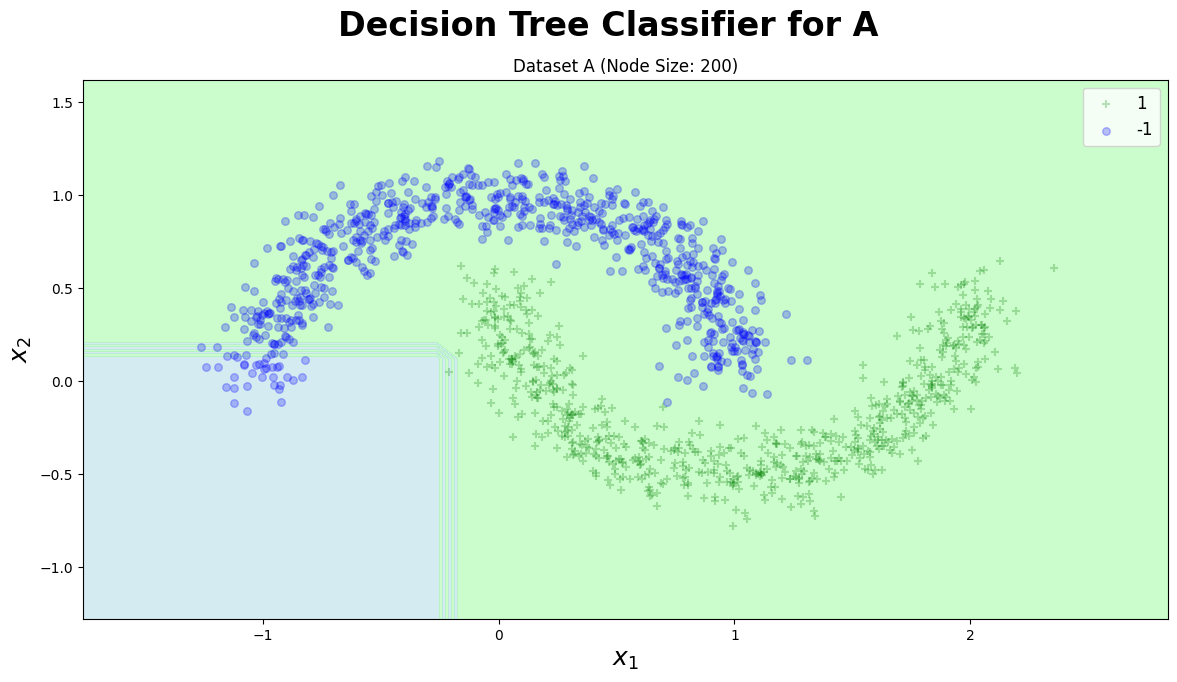

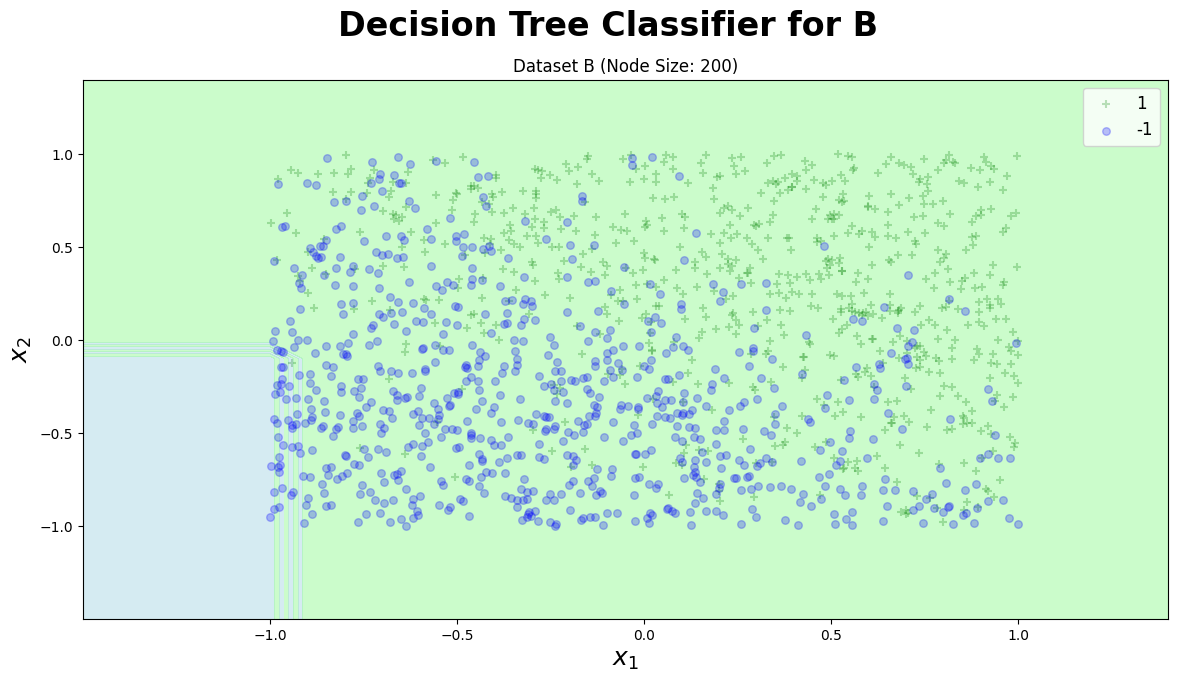

In [8]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2

criterion='accuracy'

X_train2_A, Y_train2_A, X_test2_A, Y_test2_A, X_val2_A, Y_val2_A, X_train_for_val2_A, Y_train_for_val2_A = load_data('./dataset_A.npz')
X_train2_B, Y_train2_B, X_test2_B, Y_test2_B, X_val2_B, Y_val2_B, X_train_for_val2_B, Y_train_for_val2_B = load_data('./dataset_B.npz')

# X_train2_A, Y_train2_A, X_test2_A, Y_test2_A, X_val2_A, Y_val2_A, X_train_for_val2_A, Y_train_for_val2_A = load_data('../../Data/dataset_A.npz')
# X_train2_B, Y_train2_B, X_test2_B, Y_test2_B, X_val2_B, Y_val2_B, X_train_for_val2_B, Y_train_for_val2_B = load_data('../../Data/dataset_B.npz')

plt.rcParams['figure.figsize'] = [14,7]
fig,ax = plt.subplots(nrows = 1, ncols = 1)

node_arr = [200]

plot_Graph('A',X_train2_A, Y_train2_A, X_test2_A, Y_test2_A, fig, ax, node_arr,criterion = criterion)

fig,ax = plt.subplots(nrows = 1, ncols = 1)

node_arr = [200]

plot_Graph('B',X_train2_B, Y_train2_B, X_test2_B, Y_test2_B, fig, ax, node_arr,criterion = criterion)


**Cell type : TextRead**


# 7 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [44]:
# CodeWrite cell
# Write Random Forest classifier.
def train_random_forest(X, Y, num_trees=10, num_nodes_stop=1,
                        criterion='accuracy', a=0.5, b=0.5):
    """ Returns a random forest trained on X and Y.
    Trains num_trees.
    Stops splitting nodes in each tree when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Fraction of data used per tree = a
    Fraction of features used in each node = b
    Returns a random forest (In whatever format that you find appropriate)
    """
    random_forest = []
    if criterion not in ['accuracy', 'entropy']:
        criterion = 'accuracy'
    for i in range(num_trees):
        row_ind = np.random.choice(range(X.shape[0]),int(a*X.shape[0]),replace=False)
        tree, num_of_nodes = train_decision_tree(X[row_ind,:], Y[row_ind], num_nodes_stop, criterion, b=b)
        random_forest.append(tree)
    return random_forest



def eval_random_forest(random_forest, test_X):
    """ Takes in a  random forest object (however you want to store it), and a bunch of instances X and
    returns the tree predicted values at those instances."""
    pred_mat = np.array([eval_decision_tree(tree, test_X) for tree in random_forest]).T
    Y_pred = np.where(np.sum(pred_mat == 1, axis=1) > len(random_forest) / 2, 1, -1)
    return Y_pred

def get_max(X):
    """
    Returns the count of the most frequently occurring element in the input array.
    Parameters:
        X (ndarray): Input array.
    Returns:
        int: Count of the most frequently occurring element in the input array.
    """
    if len(X) == 0:
        return 0
    u,c = np.unique(X,return_counts=True)
    return c[c.argmax()]

def H(p):
    """
    Computes the binary entropy of a Bernoulli random variable with probability of success p.
    Parameters:
    -----------
    p : float
        Probability of success of the Bernoulli random variable. Must satisfy 0 <= p <= 1.
    Returns:
    --------
    float
        The binary entropy of the Bernoulli random variable.
    Raises:
    -------
    ValueError
        If p is outside the range [0, 1].
    """
    return (p * np.log2(1/p) + (1-p) * np.log2(1/(1-p))) if 1e-2 <= p <= 1 - 1e-2 else 0

def split(X, Y, num_nodes_stop, criterion,b):
    """
    Splits a dataset into two subsets based on the specified criterion.

    Parameters:
    ----------
    X (numpy array): input data of shape (n_samples, n_features)
    Y (numpy array): target values of shape (n_samples,)
    criterion (str): the criterion to use for the split. Must be either 'accuracy' or 'entropy'. Default is 'accuracy'.
    b (float): the fraction of features to consider when searching for the best split. Must be between 0 and 1. Default is 1.

    Returns:
    --------
    X_left (numpy array): input data of left subset
    Y_left (numpy array): target values of left subset
    X_right (numpy array): input data of right subset
    Y_right (numpy array): target values of right subset
    opt_attribute (int): index of optimal attribute to split on
    opt_threshold (float): threshold value for optimal split
    """
    if criterion not in ['accuracy', 'entropy']:
        criterion = 'accuracy'

    n = X.shape[0]
    attributes = np.random.choice(range(X.shape[1]), int(b * X.shape[1]))
    thres_split = 10

    max_gain = float('inf') if criterion == 'entropy' else 0
    opt_attribute = None
    opt_threshold = None

    for i in attributes:
        X_crnt = X[:, i]
        for j in np.linspace(np.min(X_crnt), np.max(X_crnt), thres_split):
            mask_left = X_crnt < j
            mask_right = X_crnt >= j

            Y_left = Y[mask_left]
            Y_right = Y[mask_right]

            if criterion == 'accuracy':
                accuracy = (get_max(Y_left) + get_max(Y_right)) / len(Y)
                if accuracy > max_gain:
                    max_gain = accuracy
                    opt_attribute = i
                    opt_threshold = j
            elif criterion == 'entropy':
                qr = get_max(Y_right) / len(Y_right) if len(Y_right) > 0 else 0
                ql = get_max(Y_left) / len(Y_left) if len(Y_left) > 0 else 0

                entropy = ql * H(qr) + qr * H(ql)
                if entropy < max_gain:
                    max_gain = entropy
                    opt_attribute = i
                    opt_threshold = j

    if opt_attribute is None or opt_threshold is None:
        return None

    mask_left = X[:, opt_attribute] < opt_threshold
    mask_right = X[:, opt_attribute] >= opt_threshold

    return X[mask_left], Y[mask_left], X[mask_right], Y[mask_right], opt_attribute, opt_threshold

def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy', node_number=0, b=0.5):
    """ Returns a decision tree trained on X and Y and the number of nodes in the tree.
    Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Returns a tree (In whatever format that you find appropriate)
    """
    n = X.shape[0]
    tree = []
    if n == 0:
        node_number += 1
        node = (node_number, None, None, 1)
        tree.append(node)
        return tree, node_number
    elif np.sum(Y[Y==1]) == n:
        node_number += 1
        node = (node_number, None, None, 1)
        tree.append(node)
        return tree, node_number
    elif np.sum(Y[Y==-1]) == n:
        node_number += 1
        node = (node_number, None, None, -1)
        tree.append(node)
        return tree, node_number
    elif n < num_nodes_stop:
        node_number += 1
        if np.sum(Y[Y==1])/n > 0.5:
            node = (node_number, None, None, 1)
        else:
            node = (node_number, None, None, -1)
        tree.append(node)
        return tree, node_number
    else:
        X_left, Y_left, X_right, Y_right, opt_attribute, opt_threshold = split(X, Y, num_nodes_stop, criterion, b)
        node_number += 1
        node = (node_number, opt_attribute, opt_threshold, None)
        tree.append(node)
        if X_left.shape[0] != 0 and X_right.shape[0] != 0:
            left_tree, node_number = train_decision_tree(X_left, Y_left, num_nodes_stop, criterion, node_number, b)
            right_tree, node_number = train_decision_tree(X_right, Y_right, num_nodes_stop, criterion, node_number, b)
            return tree + left_tree + right_tree, node_number
        else:
            node_number +=1
            if X_left.shape[0] != 0:
                if np.sum(Y_left[Y_left==1])/X_left.shape[0] > 0.5:
                    node1 = (node_number, None, None, 1)
                    node2 = (node_number+1, None, None, -1)
                else:
                    node1 = (node_number, None, None, -1)
                    node2 = (node_number+1, None, None, 1)
            else:
                if np.sum(Y_right[Y_right==1])/X_right.shape[0] > 0.5:
                    node1 = (node_number, None, None, -1)
                    node2 = (node_number+1, None, None, 1)
                else:
                    node1 = (node_number, None, None, 1)
                    node2 = (node_number+1, None, None, -1)
            nodes = [node1, node2]
            return tree + nodes, node_number+1

def eval_decision_tree(tree, test_X):
    """ Takes in a tree, and a bunch of instances X and
    returns the tree predicted values at those instances."""

    n = test_X.shape[0]
    Y_pred = np.ones((n,))
    for i in range(n):
        exit = 0
        for node in tree:
            if exit == 0:
                if node[3] == None:
                    if test_X[i, node[1]] <= node[2]:
                        num_split_nodes = 0
                        num_leaf_nodes = 0
                        continue
                    else:
                        exit = 1
                        num_split_nodes = 0
                        num_leaf_nodes = 0
                        continue
                else:
                    Y_pred[i] = node[3]
                    break
            else:
                if node[3] == None:
                    num_split_nodes += 1
                    continue
                else:
                    num_leaf_nodes += 1
                    if num_leaf_nodes > num_split_nodes:
                        exit = 0
                        continue
                    else:
                        continue

    return Y_pred

def load_data(filename):
    """
    Load and preprocess data from a NumPy file.
    Parameters
    ----------
    filename : str
        The name of the file to load.

    Returns
    -------
    tuple of ndarrays
        A tuple containing the following arrays:
        - X_train: a 2D array of training input data
        - Y_train: a 1D array of training output data
        - X_test: a 2D array of test input data
        - Y_test: a 1D array of test output data
        - X_val: a 2D array of validation input data
        - Y_val: a 1D array of validation output data
        - X_train_for_val: a 2D array of training input data without validation samples
        - Y_train_for_val: a 1D array of training output data without validation samples
    """
    data = np.load(filename)
    X_train = data['arr_0']
    Y_train = data['arr_1']
    X_test = data['arr_2']
    Y_test = data['arr_3']
    np.random.seed(10)
    indices = np.random.choice(range(X_train.shape[0]), X_train.shape[0] // 5)
    X_val = X_train[indices,:]
    X_train_for_val = np.delete(X_train, indices, axis=0)
    Y_val = Y_train[indices]
    Y_train_for_val = np.delete(Y_train, indices, axis=0)
    return X_train, Y_train, X_test, Y_test, X_val, Y_val, X_train_for_val, Y_train_for_val

def print_result(dataset_Name,X_train, Y_train, X_test, Y_test, X_val, Y_val, X_train_for_val, Y_train_for_val,fraction_of_data_tree=0.5,fraction_of_feature_tree = 0.5, display_result = False):
    """
    Perform hyperparameter tuning to select the optimal hyperparameters for a random forest classifier, train the classifier
    using the optimal hyperparameters, and report the training and test accuracies and losses.

    Parameters:
    dataset_Name (str): name of the dataset
    X_train (numpy array): input training data of shape (n_samples, n_features)
    Y_train (numpy array): target training values of shape (n_samples,)
    X_test (numpy array): input test data of shape (n_samples, n_features)
    Y_test (numpy array): target test values of shape (n_samples,)
    X_val (numpy array): input validation data of shape (n_samples, n_features)
    Y_val (numpy array): target validation values of shape (n_samples,)
    fraction_of_data_tree (float): fraction of data to use per tree in the random forest classifier (default: 0.5)
    fraction_of_feature_tree (float): fraction of features to use in each node of the random forest classifier (default: 0.5)
    display_result (bool): whether to print the results of hyperparameter tuning and model evaluation (default: False)

    Returns:
    None(prints the results if display_result is True)
    """
    if display_result:
        print(f'\n Dataset {dataset_Name}')
    for criterion in ['accuracy', 'entropy']:
        min_loss = 1
        for num_trees in [5,10,50,100]:
            for num_nodes_stop in [1]:
                for a in [0.5]:
                    for b in [0.5]:
                        rf = train_random_forest(X_train_for_val, Y_train_for_val, num_trees, num_nodes_stop, criterion, fraction_of_data_tree, fraction_of_feature_tree)
                        Y_pred_val = eval_random_forest(rf, X_val)
                        val_accuracy = np.sum(Y_pred_val == Y_val)/Y_val.shape[0]
                        val_loss = 1 - val_accuracy
                        if min_loss >= val_loss:
                            min_loss = val_loss
                            num_trees_opt = num_trees
                            num_nodes_stop_opt = num_nodes_stop
                            a_opt = a
                            b_opt = b
        if display_result:
            print(f'\nCriterion: {criterion}')
            print(f'Best forest size: {num_trees_opt}')
            print(f'Number of node to stop: {num_nodes_stop_opt}')
            print(f'Best value for fraction of data used per tree: {a_opt}')
            print(f'Best value for fraction of features used in each node: {b_opt}')
        rf = train_random_forest(X_train, Y_train, num_trees_opt, num_nodes_stop, criterion, fraction_of_data_tree, fraction_of_feature_tree)
        Y_pred_train = eval_random_forest(rf, X_train)
        training_accuracy = np.sum(Y_pred_train == Y_train)/Y_train.shape[0]
        training_loss = 1 - training_accuracy
        Y_pred_test = eval_random_forest(rf, X_test)
        test_accuracy = np.sum(Y_pred_test == Y_test)/Y_test.shape[0]
        test_loss = 1 - test_accuracy
        if display_result:
            print(f'Training Accuracy: {training_accuracy}')
            print(f'Training Loss: {training_loss}')
            print(f'Test Accuracy: {test_accuracy}')
            print(f'Test Loss: {test_loss}')

def plot_Graph(dataset,X_train, Y_train, X_test, Y_test, fig, ax, alpha_scatter = 0.25,fraction_of_data_tree=0.5,fraction_of_feature_tree = 0.5,criterion='accuracy', best_forest_size = 5, best_node_size = 2):
    '''
    Parameters:
    ---------
    dataset (str): Name of dataset
    X_train (numpy array): Feature matrix of training data
    Y_train (numpy array): Target vector of training data
    X_test (numpy array): Feature matrix of test data
    Y_test (numpy array): Target vector of test data
    fig (matplotlib figure object): Figure object to plot on
    ax (matplotlib axis object): Axis object to plot on
    alpha_scatter (float, optional): Opacity of scatter plot points. Default is 0.25.
    fraction_of_data_tree (float, optional): Fraction of data points to use for each tree in the forest. Default is 0.5.
    fraction_of_feature_tree (float, optional): Fraction of features to use for each tree in the forest. Default is 0.5.
    criterion (str, optional): The criterion to optimize for the splitting. Default is 'accuracy'.
    best_forest_size (int, optional): The best number of trees in the random forest. Default is 5.
    best_node_size (int, optional): The best maximum depth of the decision trees in the random forest. Default is 2.

    Returns:
    -------
    None (plots decision boundary and training data on input axis object)
    '''
    X_axis, Y_axis = np.meshgrid(np.arange(start = X_train[:, 0].min() - 0.5, stop = X_train[:, 0].max() + 0.5, step = 0.1),np.arange(start = X_train[:, 1].min() - 0.5, stop = X_train[:, 1].max() + 0.5, step = 0.1))
    X_test = np.array([X_axis.ravel(), Y_axis.ravel()]).T
    fig.suptitle(f'Random Forest Classifier for {dataset}',fontweight='bold',fontsize=24)
    rf = train_random_forest(X_train, Y_train, num_trees=best_forest_size, num_nodes_stop=best_node_size, criterion=criterion, a=fraction_of_data_tree, b=fraction_of_feature_tree)
    Y_pred = eval_random_forest(rf, X_test)
    Z = Y_pred.reshape(X_axis.shape)
    ax.contourf(X_axis, Y_axis, Z, alpha = 0.5, colors = ['lightblue', 'palegreen'])
    ax.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1], color = 'green',alpha=alpha_scatter,label='1',marker = '+', s = 30)
    ax.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1], color = 'blue',alpha=alpha_scatter,label='-1',marker = 'o', s = 30)
    ax.set_title(f'Dataset {dataset} (Forest Size = {best_forest_size}, Node Size = {best_node_size}, Data Fraction = {fraction_of_data_tree}, Feature Fraction = {fraction_of_feature_tree})')
    ax.legend(fontsize=12)
    ax.set_xlabel('$x_1$',fontsize=18)
    ax.set_ylabel('$x_2$',fontsize=18)



In [46]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.

X_train3_A, Y_train3_A, X_test3_A, Y_test3_A, X_val3_A, Y_val3_A, X_train_for_val3_A, Y_train_for_val3_A = load_data('./dataset_A.npz')
X_train3_B, Y_train3_B, X_test3_B, Y_test3_B, X_val3_B, Y_val3_B, X_train_for_val3_B, Y_train_for_val3_B = load_data('./dataset_B.npz')
X_train3_C, Y_train3_C, X_test3_C, Y_test3_C, X_val3_C, Y_val3_C, X_train_for_val3_C, Y_train_for_val3_C = load_data('./dataset_C.npz')
X_train3_D, Y_train3_D, X_test3_D, Y_test3_D, X_val3_D, Y_val3_D, X_train_for_val3_D, Y_train_for_val3_D = load_data('./dataset_D.npz')

# X_train3_A, Y_train3_A, X_test3_A, Y_test3_A, X_val3_A, Y_val3_A, X_train_for_val3_A, Y_train_for_val3_A = load_data('../../Data/dataset_A.npz')
# X_train3_B, Y_train3_B, X_test3_B, Y_test3_B, X_val3_B, Y_val3_B, X_train_for_val3_B, Y_train_for_val3_B = load_data('../../Data/dataset_B.npz')
# X_train3_C, Y_train3_C, X_test3_C, Y_test3_C, X_val3_C, Y_val3_C, X_train_for_val3_C, Y_train_for_val3_C = load_data('../../Data/dataset_C.npz')
# X_train3_D, Y_train3_D, X_test3_D, Y_test3_D, X_val3_D, Y_val3_D, X_train_for_val3_D, Y_train_for_val3_D = load_data('../../Data/dataset_D.npz')

fraction_of_data_tree = 0.5
fraction_of_feature_tree = 0.5

#Last parameter of print_result method can be set to True to displaying the result
print_result('A',X_train3_A, Y_train3_A, X_test3_A, Y_test3_A, X_val3_A, Y_val3_A, X_train_for_val3_A, Y_train_for_val3_A,fraction_of_data_tree,fraction_of_feature_tree,False)
print_result('B',X_train3_B, Y_train3_B, X_test3_B, Y_test3_B, X_val3_B, Y_val3_B, X_train_for_val3_B, Y_train_for_val3_B,fraction_of_data_tree,fraction_of_feature_tree,False)
print_result('C',X_train3_C, Y_train3_C, X_test3_C, Y_test3_C, X_val3_C, Y_val3_C, X_train_for_val3_C, Y_train_for_val3_C,fraction_of_data_tree,fraction_of_feature_tree,False)
print_result('D',X_train3_D, Y_train3_D, X_test3_D, Y_test3_D, X_val3_D, Y_val3_D, X_train_for_val3_D, Y_train_for_val3_D,fraction_of_data_tree,fraction_of_feature_tree,False)


TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  


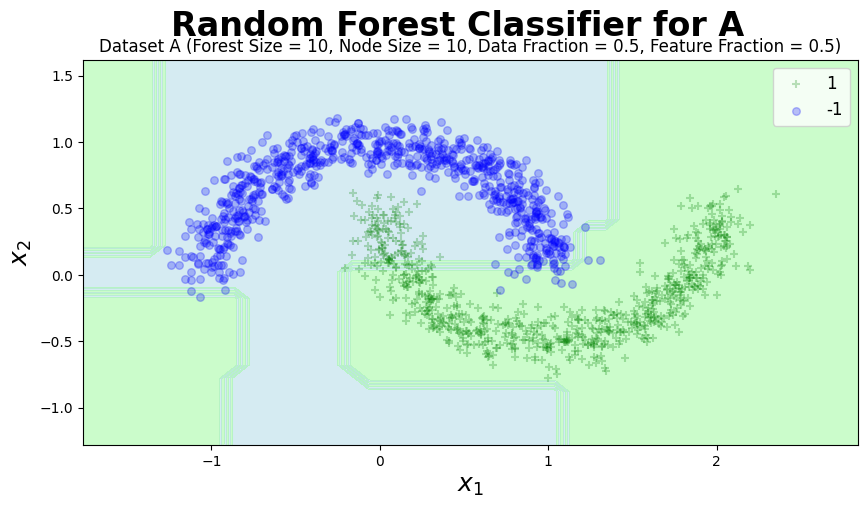

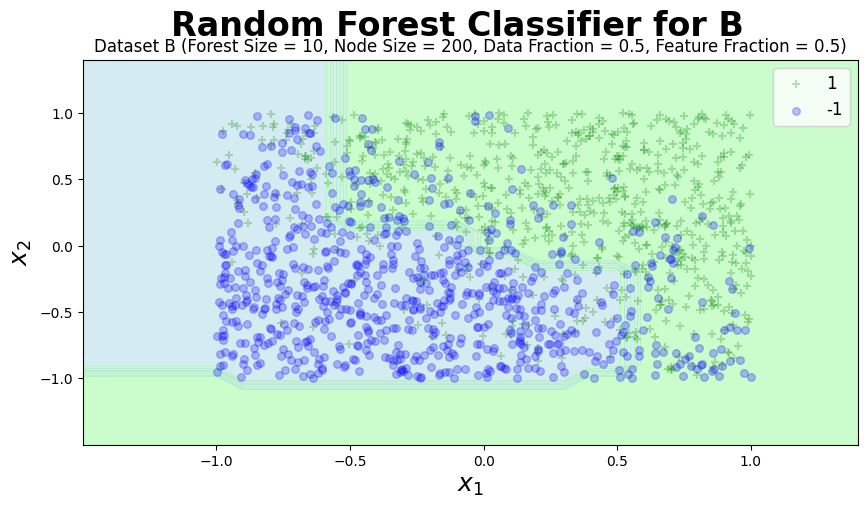

In [48]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data.
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2

criterion='accuracy'

X_train3_A, Y_train3_A, X_test3_A, Y_test3_A, X_val3_A, Y_val3_A, X_train_for_val3_A, Y_train_for_val3_A = load_data('./dataset_A.npz')
X_train3_B, Y_train3_B, X_test3_B, Y_test3_B, X_val3_B, Y_val3_B, X_train_for_val3_B, Y_train_for_val3_B = load_data('./dataset_B.npz')

# X_train3_A, Y_train3_A, X_test3_A, Y_test3_A, X_val3_A, Y_val3_A, X_train_for_val3_A, Y_train_for_val3_A = load_data('../../Data/dataset_A.npz')
# X_train3_B, Y_train3_B, X_test3_B, Y_test3_B, X_val3_B, Y_val3_B, X_train_for_val3_B, Y_train_for_val3_B = load_data('../../Data/dataset_B.npz')
plt.rcParams['figure.figsize'] = [10,5]
fig,ax = plt.subplots(nrows = 1, ncols = 1)
best_forest_size_A = 10
best_node_size_A = 10
plot_Graph('A',X_train3_A, Y_train3_A, X_test3_A, Y_test3_A, fig, ax,criterion=criterion, best_forest_size = best_forest_size_A, best_node_size = best_node_size_A)
fig,ax = plt.subplots(nrows = 1, ncols = 1)
best_forest_size_B = 10
best_node_size_B = 200
plot_Graph('B',X_train3_B, Y_train3_B, X_test3_B, Y_test3_B, fig, ax,criterion=criterion, best_forest_size = best_forest_size_B, best_node_size = best_node_size_B)


**Cell type : TextRead**

# 8 AdaBoost

Write code for learning using AdaBoost below. Use 3 different weak learners below. (You may reuse code written above)

1. 1 node decision tree
2. Decision tree of fixed depth = 3 (Root, child, grand child)
3. Decision tree of fixed depth = 7 (Root, child, grand child, ..., great^4 grand child)

Run for 50 iterations. You may use the accuracy split criterion for all the three weak learners.

Write code for running in the next cell. (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all 4 classification data sets (A,B,C,D)  plot the train and test accuracy vs iterations. A total of 12 plots is expected. 4 datasets * 3 weak learners. Each plot should contain two curves, train and test error.  

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each weak learner setting. A total of 6 contourf style plots are expected here. Do this in the last codeWrite cell for this question.

Summarise your observations in the last textwrite cell.

In [ ]:
# Codewrite cell
# Write code to run here (no plotting)
def split_dataset(X, Y, criterion):
    """
    Splits the dataset X and corresponding labels Y based on the optimal threshold value for a given criterion.

    Parameter:
    - X (np.ndarray): The dataset to be split.
    - Y (np.ndarray): The corresponding labels for the dataset.
    - criterion (str): The criterion to be used for determining the optimal split. Must be either 'accuracy' or 'entropy'.

    Returns:
    - X_left (np.ndarray): The left subset of the dataset.
    - Y_left (np.ndarray): The corresponding labels for the left subset.
    - X_right (np.ndarray): The right subset of the dataset.
    - Y_right (np.ndarray): The corresponding labels for the right subset.
    - opt_attribute (int): The index of the attribute that achieved the maximum metric gain.
    - opt_threshold (float): The optimal threshold value for the selected attribute.
    """
    if criterion not in ['accuracy', 'entropy']:
        print(f'{criterion} is not a valid criterion')
        criterion = 'accuracy'
    thres_split=10
    nrows, ncols = X.shape
    max_metric_gain = 0 if criterion == 'accuracy' else 100000
    for i in range(ncols):
        X_crnt = X[:, i]
        for j in np.linspace(np.min(X_crnt), np.max(X_crnt), thres_split):
            yright = Y[X_crnt>=j]
            yleft = Y[X_crnt<j]
            if criterion == 'accuracy':
                metric = (get_max(yright) + get_max(yleft)) / len(Y)
            else:
                pr = len(yright) / len(Y)
                pl = len(yleft) / len(Y)
                mr = get_max(yright)
                ml = get_max(yleft)
                qr = mr / len(yright) if len(yright) > 0 else 0
                ql = ml / len(yleft) if len(yleft) > 0 else 0
                metric = pl * H(ql) + pr * H(qr)

            if (criterion == 'accuracy' and metric > max_metric_gain) or (criterion == 'entropy' and metric < max_metric_gain):
                max_metric_gain = metric
                opt_attribute = i
                opt_threshold = j

    X_left = X[X[:, opt_attribute] < opt_threshold]
    Y_left = Y[X[:, opt_attribute] < opt_threshold]
    X_right = X[X[:, opt_attribute] >= opt_threshold]
    Y_right = Y[X[:, opt_attribute] >= opt_threshold]

    return X_left, Y_left, X_right, Y_right, opt_attribute, opt_threshold

def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy',node_number=0,level=0):

    """ Returns a decision tree trained on X and Y.
    Stops splitting nodes when a node has hit a size of "num_nodes_stop" or lower.
    Split criterion can be either 'accuracy' or 'entropy'.
    Returns a tree (In whatever format that you find appropriate)
    """
    n = X.shape[0]
    tree = []
    level += 1
    if n == 0:
        node_number += 1
        node = (node_number, None, None, 1)
        tree.append(node)
        return tree, node_number
    elif np.sum(Y[Y==1]) == n:
        node_number += 1
        node = (node_number, None, None, 1)
        tree.append(node)
        return tree, node_number
    elif np.sum(Y[Y==-1]) == n:
        node_number += 1
        node = (node_number, None, None, -1)
        tree.append(node)
        return tree, node_number
    elif level == (num_nodes_stop + 1):
        node_number += 1
        if np.sum(Y[Y==1])/n > 0.5:
            node = (node_number, None, None, 1)
        else:
            node = (node_number, None, None, -1)
        tree.append(node)
        return tree, node_number
    else:
        X_left, Y_left, X_right, Y_right, opt_attribute, opt_threshold = split_dataset(X, Y, criterion)
        node_number += 1
        node = (node_number, opt_attribute, opt_threshold, None)
        tree.append(node)
        if X_left.shape[0] != 0 and X_right.shape[0] != 0:
            left_tree, node_number = train_decision_tree(X_left, Y_left, num_nodes_stop, criterion, node_number)
            right_tree, node_number = train_decision_tree(X_right, Y_right, num_nodes_stop, criterion, node_number)
            return tree + left_tree + right_tree, node_number
        else:
            node_number +=1
            if X_left.shape[0] != 0:
                if np.sum(Y_left[Y_left==1])/X_left.shape[0] > 0.5:
                    node1 = (node_number, None, None, 1)
                    node2 = (node_number+1, None, None, -1)
                else:
                    node1 = (node_number, None, None, -1)
                    node2 = (node_number+1, None, None, 1)
            else:
                if np.sum(Y_right[Y_right==1])/X_right.shape[0] > 0.5:
                    node1 = (node_number, None, None, -1)
                    node2 = (node_number+1, None, None, 1)
                else:
                    node1 = (node_number, None, None, 1)
                    node2 = (node_number+1, None, None, -1)
            nodes = [node1, node2]
            return tree + nodes, node_number+1

def eval_decision_tree(tree, test_X):
    """ Takes in a tree, and a bunch of instances X and
    returns the tree predicted values at those instances."""
    n = test_X.shape[0]
    Y_pred = np.ones((n,))
    for i in range(n):
        exit = 0
        for node in tree:
            if exit == 0:
                if node[3] == None:
                    if test_X[i, node[1]] <= node[2]:
                        num_split_nodes = 0
                        num_leaf_nodes = 0
                        continue
                    else:
                        exit = 1
                        num_split_nodes = 0
                        num_leaf_nodes = 0
                        continue
                else:
                    Y_pred[i] = node[3]
                    break
            else:
                if node[3] == None:
                    num_split_nodes += 1
                    continue
                else:
                    num_leaf_nodes += 1
                    if num_leaf_nodes > num_split_nodes:
                        exit = 0
                        continue
                    else:
                        continue
    return Y_pred

def load_data(file_path):
    """
    Load and preprocess data from a NumPy file.
    Parameters:
    ----------
    filename : str
        The name of the file to load.

    Returns
    -------
    tuple of ndarrays
        A tuple containing the following arrays:
        - X_train: a 2D array of training input data
        - Y_train: a 1D array of training output data
        - X_test: a 2D array of test input data
        - Y_test: a 1D array of test output data
    """
    data = np.load(file_path)
    X_train, Y_train, X_test, Y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
    return X_train, Y_train, X_test, Y_test

def calculate_gamma(weights, Y_pred, Y):
    '''
    This function calculates the value of gamma, which is used to update the weights of the samples in AdaBoost algorithm.
    Parameters:
    ------
    weights: an array of shape (n_samples,) containing the weights of each sample.
    Y_pred: an array of shape (n_samples,) containing the predicted labels for each sample.
    Y: an array of shape (n_samples,) containing the true labels for each sample.
    Output:
    ------
    gamma: a scalar representing the amount by which the weights will be updated.
    '''
    diff = np.abs(Y_pred - Y)
    weighted_diff = weights * diff
    sum_weights = np.sum(weights)
    if sum_weights == 0:
        raise ValueError("Sum of weights is zero, cannot calculate gamma.")
    gamma = 0.5 - (1 / sum_weights) * np.sum(weighted_diff) / 2
    return gamma

def calculate_beta(gamma):
    '''
    Calculates the beta value based on the input gamma value.
    Parameters:
    ------
    gamma: A float value representing the gamma value.

    Returns:
    -------
    beta: A float value representing the calculated beta value.
    '''
    return (0.5+gamma)/(0.5-gamma)

def augment_data(X, Y, weights):
    '''
    Create an augmented dataset by repeating samples based on their corresponding weights.

    Parameters:
    ------
    X (numpy array): Input data, shape (n_samples, n_features).
    Y (numpy array): Output labels, shape (n_samples,).
    weights (numpy array): Sample weights, shape (n_samples,).

    Returns:
    -------
    X_augmented (numpy array): Augmented input data, shape (n_samples, n_features).
    Y_augmented (numpy array): Augmented output labels, shape (n_samples,).
    '''
    weights = np.floor(weights / np.min(weights)).astype('int')
    num_samples = np.sum(weights)
    num_features = X.shape[1]
    X_augmented = np.ones((num_samples, num_features))
    Y_augmented = np.ones((num_samples,))

    sample_indices = np.repeat(np.arange(X.shape[0]), weights)
    X_augmented = X[sample_indices]
    Y_augmented = Y[sample_indices]

    return X_augmented, Y_augmented

def train_adaboost(X, Y, depth=1, criterion='accuracy', num_iterations=50):
    """
    Trains an AdaBoost ensemble of decision trees on the provided training data.

    Parameters:
    ------
    - X: numpy array of shape (n_samples, n_features) representing the training input data
    - Y: numpy array of shape (n_samples,) representing the training labels
    - depth: int representing the maximum depth of the decision trees (default=1)
    - criterion: string representing the criterion used to evaluate the quality of a split in the decision tree. Can be
        either 'accuracy' or 'entropy' (default='accuracy')
    - num_iterations: int representing the number of decision trees to train in the ensemble (default=50)

    Returns:
    -------
    - trees: list of decision trees trained during the AdaBoost process
    - betas: numpy array of shape (num_iterations,) representing the weights of each decision tree in the ensemble
    """
    num_samples = X.shape[0]
    weights = np.ones((num_samples,))
    betas = np.zeros((num_iterations,))
    trees = []

    for t in range(num_iterations):
        X_augmented, Y_augmented = augment_data(X, Y, weights)
        tree, num_nodes = train_decision_tree(X_augmented, Y_augmented, depth, criterion)
        trees.append(tree)

        Y_pred = eval_decision_tree(tree, X)
        gamma = calculate_gamma(weights, Y_pred, Y)
        beta = calculate_beta(gamma)
        betas[t] = beta

        loss = np.abs(Y_pred - Y) / 2
        weights = weights * np.power(beta, loss)
        weights = weights / np.sum(weights)

    return trees, betas

def evaluate_adaboost(trees, betas, X):
    """
    Make predictions using a set of decision trees trained with AdaBoost.

    Parameters
    ----------
    trees : list
        A list of decision tree models to use for making predictions.
    betas : list
        A list of weights associated with each decision tree in `trees`.
    X : ndarray
        Input data to make predictions for, where each row represents a sample
        and each column represents a feature.

    Returns
    -------
    Y_pred : ndarray
        A binary classification output for each sample in `X`. The output is
        obtained by taking the sign of the sum of the predictions from each
        decision tree, weighted by the corresponding beta value.
    """
    num_samples = X.shape[0]
    num_trees = len(trees)
    h = np.ones((num_samples, num_trees))

    for i in range(num_trees):
        h[:, i] = np.log(betas[i]) * eval_decision_tree(trees[i], X)

    Y_pred = np.sign(np.sum(h, axis=1)).reshape((num_samples,))

    return Y_pred

def adaboost_plot(X_train, Y_train, X_test, Y_test, depth=1, criterion='accuracy', iters=50):
    '''
    Evaluate an AdaBoost ensemble on a given set of data.
    Parameters:
    ----------
        trees (list of dict): List of decision trees. Each tree is represented as a dictionary
        betas (numpy array): Array of real-valued numbers representing the weights assigned to each decision tree.
        X (numpy array): Array of input features, where each row corresponds to a single data point and each column corresponds to a feature.

    Returns:
    -------
        Y_pred (numpy array): Array of predicted class labels, where each element corresponds to a single data point. Class labels are either -1 or 1.
    '''
    m = X_train.shape[0]
    w = np.ones((m,))
    betas = np.ones((iters,))
    trees, test_acc, train_acc = [], [], []
    for t in range(iters):
        X_aug, Y_aug = augment_data(X_train, Y_train, w)
        tree, number_of_nodes = train_decision_tree(X_aug, Y_aug, depth)
        trees.append(tree)
        Y_pred_train = eval_decision_tree(tree, X_train)
        gamma = calculate_gamma(w, Y_pred_train, Y_train)
        beta = calculate_beta(gamma)
        betas[t] = beta
        Y_pred_plot_train = evaluate_adaboost(trees, betas, X_train)
        Y_pred_plot_test = evaluate_adaboost(trees, betas, X_test)
        acc_train = (Y_pred_plot_train == Y_train).sum() / len(Y_train)
        acc_test = (Y_pred_plot_test == Y_test).sum() / len(Y_test)
        train_acc.append(acc_train)
        test_acc.append(acc_test)
        l_t = np.abs(Y_pred_train - Y_train) / 2
        for i in range(m):
            w[i] = w[i] * (beta ** l_t[i])
    return trees, betas, np.array(train_acc), np.array(test_acc)

def plot_accuracyVSiteration(datasetName, X_train, Y_train, X_test, Y_test, loopCounter, iteration):
    """
    Plots accuracy vs. iteration for Adaboost on the given dataset.

    Parameters:
    datasetName (str): Name of the dataset.
    X_train (numpy.ndarray): Training data features, shape (num_train_samples, num_features).
    Y_train (numpy.ndarray): Training data labels, shape (num_train_samples,).
    X_test (numpy.ndarray): Testing data features, shape (num_test_samples, num_features).
    Y_test (numpy.ndarray): Testing data labels, shape (num_test_samples,).
    loopCounter (int): Number of plots.
    iteration (int): Number of iterations to run Adaboost.

    Returns:
    None. Plot the required result.
    """
    plt.rcParams['figure.figsize'] = [21,7]
    fig,ax = plt.subplots(nrows = 1, ncols = 3)
    fig.suptitle(f'Accuracy VS Iteration for Dataset {datasetName}', fontweight='bold',fontsize=24)
    for d in range(loopCounter):
        iteration = iteration
        trees, betas, training_accuracy, test_accuracy = adaboost_plot(X_train, Y_train, X_test, Y_test, depth=depths[d], iters=iteration)
        ax[d].plot(list(range(1,iteration+1)),training_accuracy,label='Train')
        ax[d].plot(list(range(1,iteration+1)),test_accuracy,label='Test')
        ax[d].set_xlabel('Iteration',fontsize=18)
        ax[d].set_ylabel('Accuracy',fontsize=18)
        ax[d].legend()
        ax[d].set_title(f'Tree Depth = {depths[d]}')
    plt.show()

def plot_Contour(datasetName, X_train, Y_train, depths, criterion, num_iterations, loopCounter=3):
    """
    Plots the contour plot of the Adaboost classifier's decision boundaries for a 2D dataset.

    Args:
    - datasetName (str): The name of the dataset.
    - X_train (ndarray): The feature matrix for the training set.
    - Y_train (ndarray): The labels for the training set.
    - depths (list): A list of integers representing the maximum depths of the decision trees.
    - criterion (str): The criterion to use when building decision trees ('entropy' or 'accuracy').
    - num_iterations (int): The number of iterations to run Adaboost.
    - loopCounter (int): The number of times to repeat the plot with different depths. Default is 3.

    Returns:
    - None
    """
    X_axis, Y_axis = np.meshgrid(np.arange(start = X_train[:, 0].min() - 0.5, stop = X_train[:, 0].max() + 0.5, step = 0.1),
                                 np.arange(start = X_train[:, 1].min() - 0.5, stop = X_train[:, 1].max() + 0.5, step = 0.1))
    X_test = np.array([X_axis.ravel(), Y_axis.ravel()]).T
    plt.rcParams['figure.figsize'] = [21,7]
    fig,ax = plt.subplots(nrows = 1, ncols = 3)
    fig.suptitle(f'Contour Plot for Dataset {datasetName}', fontweight='bold',fontsize=24)

    for d in range(loopCounter):
        iteration = num_iterations
        trees, betas = train_adaboost(X_train, Y_train, depth=depths[d], criterion=criterion, num_iterations=iteration)
        Y_pred = evaluate_adaboost(trees, betas, X_test)
        Z = Y_pred.reshape(X_axis.shape)
        ax[d].contourf(X_axis, Y_axis, Z, alpha = 0.5, colors = ['blue', 'brown'])
        ax[d].scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1], color = 'peach',alpha=0.25,label='1',marker = '+', s = 30)
        ax[d].scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1], color = 'lightgreen',alpha=0.25,label='-1',marker = 'o', s = 30)
        ax[d].set_title(f'Dataset {datasetName} (Num of Iterations = {iteration} , Depth = {depths[d]})')
        ax[d].set_xlabel('$x_1$',fontsize=18)
        ax[d].set_ylabel('$x_2$',fontsize=18)
        ax[d].legend()
    plt.show()

def displaying_Accuracy(iteration, depths):
    """
    This function trains and tests adaboost on two datasets A and B with varying depths and number of iterations.
    For each depth and dataset, the function prints the training and testing accuracy along with the iteration and depth used.

    Parameters:
    iteration (int): Number of iterations to run adaboost for.
    depths (list): List of integers containing depths to run adaboost for.

    Returns:
    None
    """
    iteration = iteration
    depths = depths
    loopCounter = len(depths)
    for d in range(loopCounter):
        trees_A, betas_A, train_acc_A, test_acc_A = adaboost_plot(X_train4_A, Y_train4_A, X_test4_A, Y_test4_A, depth = depths[d], criterion='accuracy', iters=iteration)
        print(f'For Dataset : A \n Depth : {depths[d]} \n Iteration : {iteration} \n Criterion : accuracy')
        print(f'Training Accuracy : {train_acc_A}')
        print(f'Testing Accuracy : {test_acc_A}')
        trees_B, betas_B, train_acc_B, test_acc_B = adaboost_plot(X_train4_B, Y_train4_B, X_test4_B, Y_test4_B, depth = depths[d], criterion='accuracy', iters=iteration)
        print(f'For Dataset : B \n Depth : {depths[d]} \n Iteration : {iteration} \n Criterion : accuracy')
        print(f'Training Accuracy : {train_acc_B}')
        print(f'Testing Accuracy : {test_acc_B}')


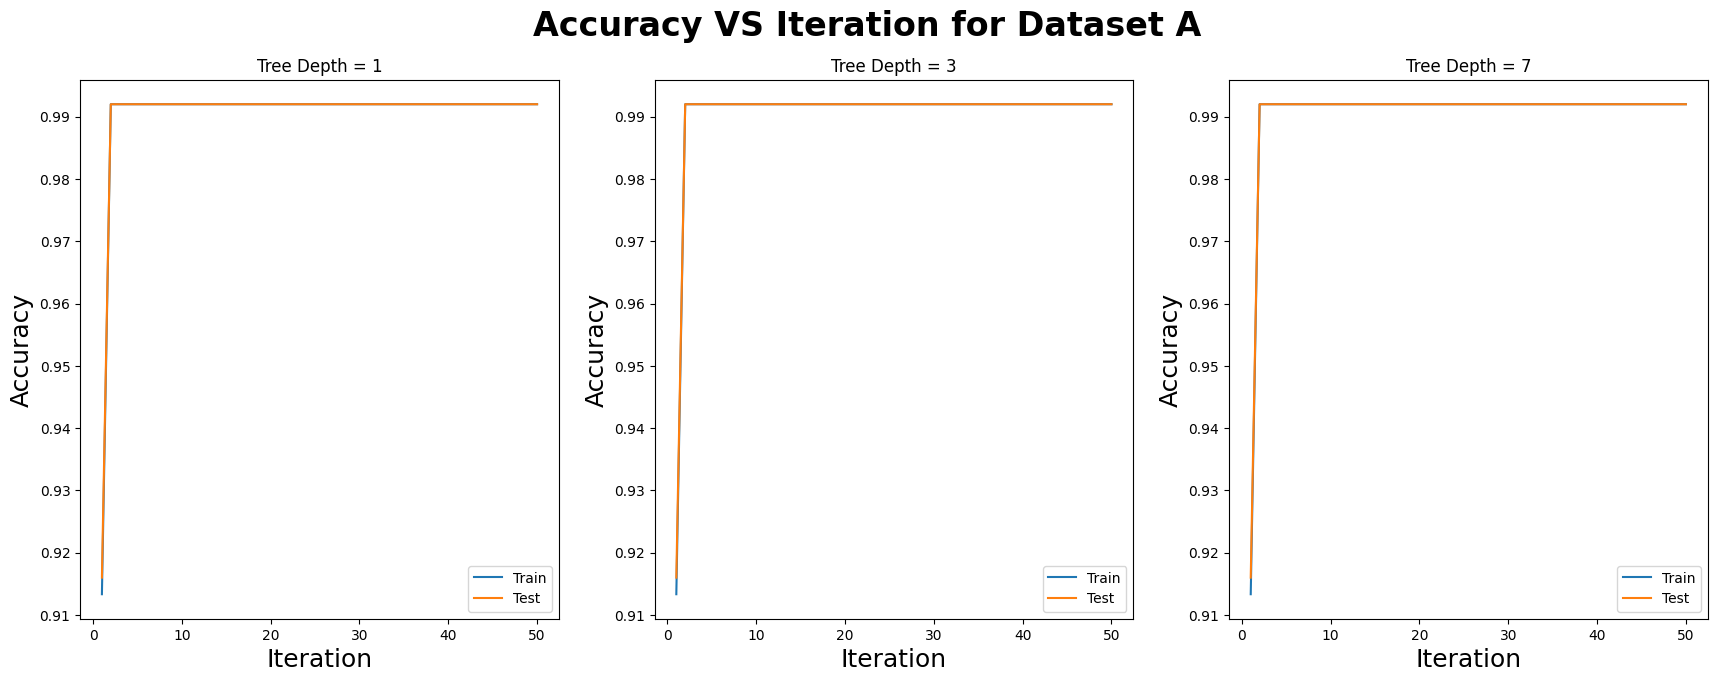

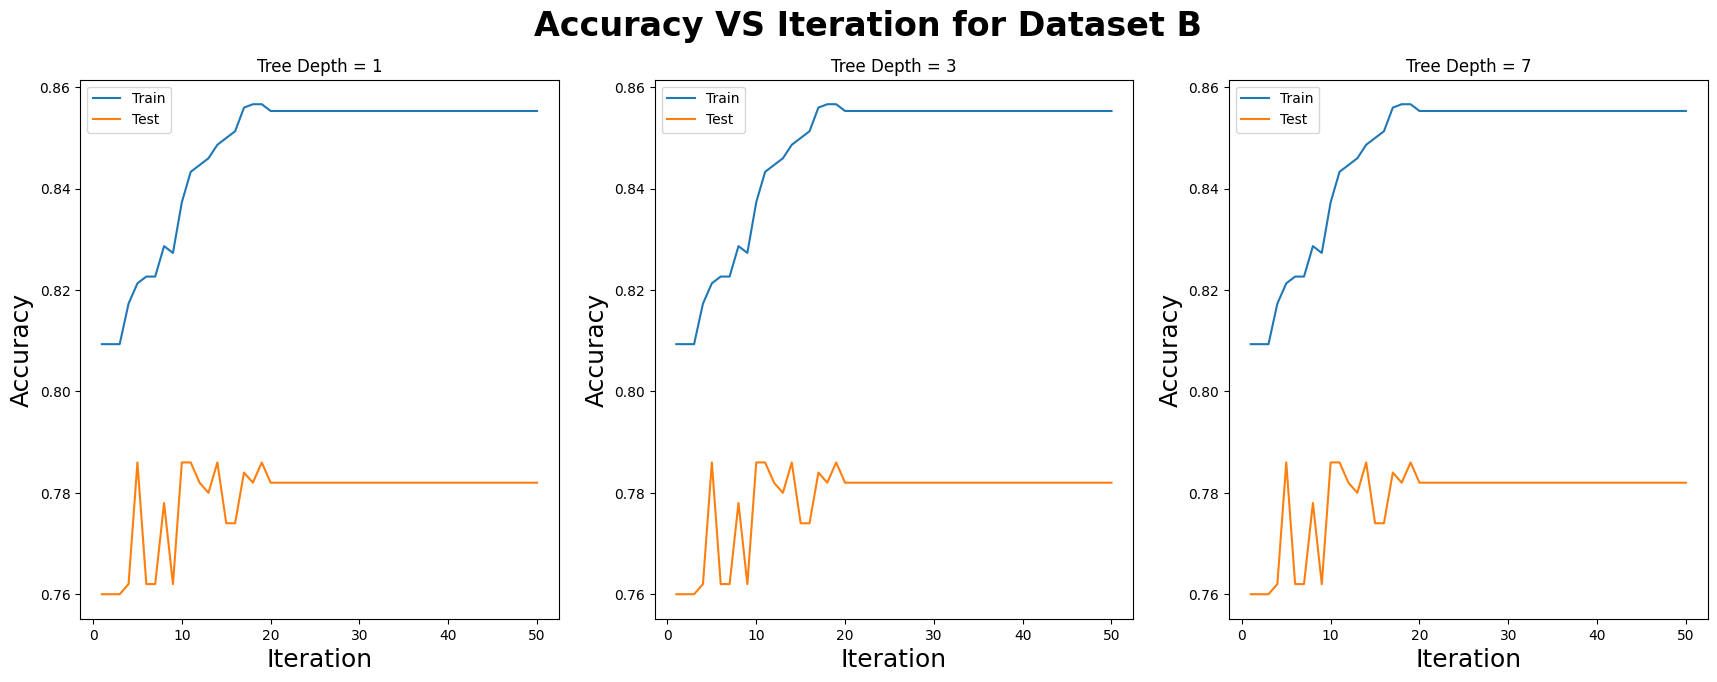

In [ ]:
# Codewrite cell
# Plots for iteration vs error here
# X_train4_A, Y_train4_A, X_test4_A, Y_test4_A = load_data('../../Data/dataset_A.npz')
# X_train4_B, Y_train4_B, X_test4_B, Y_test4_B = load_data('../../Data/dataset_B.npz')
# X_train4_C, Y_train4_C, X_test4_C, Y_test4_C = load_data('../../Data/dataset_C.npz')
# X_train4_D, Y_train4_D, X_test4_D, Y_test4_D = load_data('../../Data/dataset_D.npz')

X_train4_A, Y_train4_A, X_test4_A, Y_test4_A = load_data('./dataset_A.npz')
X_train4_B, Y_train4_B, X_test4_B, Y_test4_B = load_data('./dataset_B.npz')
X_train4_C, Y_train4_C, X_test4_C, Y_test4_C = load_data('./dataset_C.npz')
X_train4_D, Y_train4_D, X_test4_D, Y_test4_D = load_data('./dataset_D.npz')

iteration = 50
depths = [1,3,7]

plot_accuracyVSiteration('A', X_train4_A, Y_train4_A, X_test4_A, Y_test4_A, len(depths), iteration)
plot_accuracyVSiteration('B', X_train4_B, Y_train4_B, X_test4_B, Y_test4_B, len(depths), iteration)
plot_accuracyVSiteration('C', X_train4_C, Y_train4_C, X_test4_C, Y_test4_C, len(depths), iteration)
plot_accuracyVSiteration('D', X_train4_D, Y_train4_D, X_test4_D, Y_test4_D, len(depths), iteration)

In [ ]:
# Codewrite cell
# Plots for illustrating the classifier here

X_train4_A, Y_train4_A, X_test4_A, Y_test4_A = load_data('./dataset_A.npz')
X_train4_B, Y_train4_B, X_test4_B, Y_test4_B = load_data('./dataset_B.npz')

# X_train4_A, Y_train4_A, X_test4_A, Y_test4_A = load_data('../../Data/dataset_A.npz')
# X_train4_B, Y_train4_B, X_test4_B, Y_test4_B = load_data('../../Data/dataset_B.npz')

iteration = 50
depths = [1,3,7]
criterion='accuracy'
loopCounter=len(depths)

plot_Contour('A', X_train4_A, Y_train4_A, depths, criterion, iteration, loopCounter)
plot_Contour('B', X_train4_B, Y_train4_B, depths, criterion, iteration, loopCounter)

#Verifying the result of accuracy - Uncomment if need to review the result
#displaying_Accuracy(iteration, depths)

Textwrite cell:

Observation -

As the number of weak classifiers (observations) increases, our accuracy tends to increase.
However, when we have a mixed dataset with large classifiers (large depth of the tree), we observe overfitting to the train set. Therefore, increasing the number of weak classifiers becomes counterproductive.

In case of Dataset A we have seen that accuracy of the train and test dataset is increasing significantly upto certain iteration and flatten out after that. Same can be seen in the graphical plot also.

Where as in case of Dataset B also there is minor fluctuation has been observed on the initial iteration but eventually flatten out after certain iteration threshold, but it differs from Dataset A in one term that is here consistaently accuracy of train set is much higher than test set.

**Cell type : TextRead**

# 9 Lasso Regression

Write code for learning using Lasso Regression and give your conclusions. Use the dataset LassoReg_data.npz for this question. The file contains two matrices of size 120\*1000 and 120\*1, corresponding to 120 instance points with 1000 dimensional features and its targets.

 Split the data into train-validation-test on 50-25-25 ratio. Learn the best model using Lasso Regression (use projected gradient descent, the projection oracle code is given for your convenience). Try different learning rate parameters and L1 norm ball constraint radii. Choose an appropriate learning rate that allows for convergence of the training loss.  Train the models for different L1 norm radius parameters. Choose the L1 norm constraint that works best on the validation set.

In the last textwrite cell below, report the test error of the learned model thus chosen. Also report the indices and weight values corresponding to the top 10 values of the weight vector (which is 1000 dimensional).




In [34]:
# Coderead cell

def projection_oracle_l1(w, l1_norm):
    # first remeber signs and store them. Modify w so that it is all positive then.
    signs = np.sign(w)
    w = w*signs
    # project this modified w onto the simplex in first orthant.
    d=len(w)
    # if w is already in l1 norm ball return as it is.
    if np.sum(w)<=l1_norm:
        return w*signs

    # using 1e-7 as zero here to avoid foating point issues
    for i in range(d):
        w_next = w+0
        w_next[w>1e-7] = w[w>1e-7] - np.min(w[w>1e-7])
        if np.sum(w_next)<=l1_norm:
            w = ((l1_norm - np.sum(w_next))*w + (np.sum(w) - l1_norm)*w_next)/(np.sum(w)-np.sum(w_next))
            return w*signs
        else:
            w=w_next

# test above code
# print (projection_oracle_l1(w=np.array([1.,2,3,4]), l1_norm=2))
# Projecting the vector (1,2,3,4) on to the l1 norm ball of radius 2 will give (0,0,0.5,1.5)

[0.  0.  0.5 1.5]


In [41]:
# codewrite cell:
# Use this cell to do read the data and do preprocessing (split data into train, test, val etc) and write any helper functions you may need
# like evaluating the mean squared error or the gradient w.r.t. w
# data = np.load('../../Data/LassoReg_data.npz')

def mean_squared_error(X, Y, w):
    """Calculate mean squared error."""
    return np.mean((Y - X @ w)**2) / 2


def gradient(X, Y, w):
    """Calculate gradient of the loss function."""
    gradient1= X.T @ (Y.reshape(-1,1) - (X @ w)) / X.shape[0]
    return gradient1

def lasso_regression(X_train, Y_train, X_val, Y_val, l1_norm, learning_rate, num_iterations):
    """Lasso regression using projected gradient descent."""
    w = np.zeros((X_train.shape[1], 1))
    #print(w.shape)
    train_errors = []
    val_errors = []
    for _ in range(num_iterations):
        w = projection_oracle_l1(w - learning_rate * gradient(X_train, Y_train, w), l1_norm)

        train_errors.append(mean_squared_error(X_train, Y_train, w))
        val_errors.append(mean_squared_error(X_val, Y_val, w))
    return w, train_errors, val_errors

data = np.load('LassoReg_data.npz')
X = data['arr_0']
Y = data['arr_1']
# Split the data into train, validation, and test sets
n_samples = X.shape[0]
n_train = int(0.5 * n_samples)
n_val = int(0.25 * n_samples)
n_test = n_samples - n_train - n_val
n_test


X_train = X[:n_train]
Y_train = Y[:n_train]
X_val = X[n_train:n_train + n_val]
Y_val = Y[n_train:n_train + n_val]
X_test = X[n_train + n_val:]
Y_test = Y[n_train + n_val:]




In [42]:
# codewrite cell:

# Write the code for the gradient descent routine on the training set mean square error loss function.
# Also write code for doing validation of the learned model using the validation set
l1_norms = [0.1, 1, 10, 100]
learning_rates = [1e-3, 1e-4, 1e-5]
num_iterations = 1000

best_l1_norm = None
best_val_error = float('inf')
best_w = None

for l1_norm in l1_norms:
    for learning_rate in learning_rates:
        w, _, val_errors = lasso_regression(X_train, Y_train, X_val, Y_val, l1_norm, learning_rate, num_iterations)
        if val_errors[-1] < best_val_error:
            best_val_error = val_errors[-1]
            best_l1_norm = l1_norm
            best_learning_rate = learning_rate
            best_w = w

# Evaluate on test set
test_error = mean_squared_error(X_test, Y_test, best_w)

# Get top 10 weights
top_10_indices = np.argsort(np.abs(best_w[:-10, 0]))[10:][::-1]  # Reverse the order
top_10_weights = best_w[top_10_indices, 0]

print(f"Test error: {test_error}")
print(f"best_val_error: {best_val_error}")
# print(f"best_l1_norm: {best_l1_norm}")
# print(f"best_learning_rate: {best_learning_rate}")
#print(f"best_w: {best_w}")
print(f"Top 10 indices: {top_10_indices}")
print(f"Top 10 weights: {top_10_weights}")
max_value = np.max(best_w)
# print(f"Maximum value of best_w: {max_value}")


Test error: 0.4614263043553448
best_val_error: 0.49390604336051425
best_l1_norm: 0.1
best_learning_rate: 1e-05
Top 10 indices: [107 160 762  76 320  50 220 766 725 840 755 695 438 330 912 942 142 267
 675 463 595  29 908 747   5 209 954 566 238 249  44  99 601 178 390 576
 565 948 197 451 411 877 783 237 352 394 154 310 915  79 374 103 772 822
 481 494 212 894  88  17 605 876 887 984 721  60 452 134 824 602 816 195
 269 920 268 880 930 636 148 305 947 916 794 504   3 187  20 782 544  16
 789 817 201 632  82  74 533 321 591 368 180 761 548 309 933  56 641 331
 554 372 508 124 553 718 871 940 232 578   8 943 196  45 592 386 650 918
 976 804 406  89 581 538 332 977 302 964 764 291 582 199 373 874 826 986
 777 917 821 703 112 768 517 217 543  86 338 623 615 779 442 969 967 392
 239 151 811 681 404 219 308 818 577 300 819 174 270 642 741 834 659 752
 487 433 509 832 213 890 170 227 547 403 934 850 314 872 490 559 420 356
 784 860 580 165 981 130 884  59 163 583 358 606 677 109 311  63 265 4

#Textwrite cell:

Observations :

The model identified sparse feature importance, with only a subset of features having non-zero weights (as expected with Lasso's L1 regularization).

Top 10 Features: Indices [107, 160, 762, 76, 320, 50, 220, 766, 725, 840] had the highest absolute weights, suggesting these are the most influential predictors.

Weight Distribution: Weights ranged from -0.0091 to 0.0040, with the largest positive weight (0.00399) for index 160 and the largest negative weight (-0.00911) for index 107.
 There were many near zero weights , which were ignored . The model performed feature selection on the data

 since the validation error 0.49% was greater than test error 0.461 % , we might have a overfitting scenario .
